# Predykcja wyniku meczu CS:GO
CS:GO - https://pl.wikipedia.org/wiki/Counter-Strike:_Global_Offensive

### Dane:
Dane zostały pozyskane poprzez webscarping ogolnodostępnej strony : https://www.hltv.org/, zawierające wyniki oraz statystyki profesjonalnych meczów cs:go.
Skrypty potrzebne do pobrania danych znajduja się w osobnym pliku !!!!!!!!!!!!!(NAZWE WSTAW)

### Cel:
Okreslenie wyniku pojedynczego spotkania - która drużyna zwycięzy. Sprowadza się to do zadania 1 jezeli wygrywa pierwsza druzyna oraz 0 jezeli wygrywa 2 druzyna (klasyfikator binarny)

### Klasa problemu:
Jako że znamy wyniki spotkań(label) mozemy wykorzystać uczenie nadzorowane (supervised learning). Znana jest takze liczba klas (2)





In [545]:
import pandas as pd
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

Pobieramy dane wczesniej przygotowane po stronie 2 skryptu

In [335]:
df_data = pd.read_pickle('df_data_connected.pkl')

In [336]:
pd.set_option('display.max_columns', 500)
df_data.head(10)

,date,team1main,team2main,map,eventmain,link,score_team1main,score_team2main,date_time,eventdetails,map_number,match_type,score_team1details,score_team2details,score_total,team1details,team1_clutches_won,team1_first_kills,team1_p_ADR_1,team1_p_ADR_2,team1_p_ADR_3,team1_p_ADR_4,team1_p_ADR_5,team1_p_asists_1,team1_p_asists_2,team1_p_asists_3,team1_p_asists_4,team1_p_asists_5,team1_p_death_1,team1_p_death_2,team1_p_death_3,team1_p_death_4,team1_p_death_5,team1_p_kast_1,team1_p_kast_2,team1_p_kast_3,team1_p_kast_4,team1_p_kast_5,team1_p_kills_1,team1_p_kills_2,team1_p_kills_3,team1_p_kills_4,team1_p_kills_5,team1_p_rating_1,team1_p_rating_2,team1_p_rating_3,team1_p_rating_4,team1_p_rating_5,team1_player_name_1,team1_player_name_2,team1_player_name_3,team1_player_name_4,team1_player_name_5,team1_rating,team1_score_1half,team1_score_2half,team1side,team2details,team2_clutches_won,team2_first_kills,team2_p_ADR_1,team2_p_ADR_2,team2_p_ADR_3,team2_p_ADR_4,team2_p_ADR_5,team2_p_asists_1,team2_p_asists_2,team2_p_asists_3,team2_p_asists_4,team2_p_asists_5,team2_p_death_1,team2_p_death_2,team2_p_death_3,team2_p_death_4,team2_p_death_5,team2_p_kast_1,team2_p_kast_2,team2_p_kast_3,team2_p_kast_4,team2_p_kast_5,team2_p_kills_1,team2_p_kills_2,team2_p_kills_3,team2_p_kills_4,team2_p_kills_5,team2_p_rating_1,team2_p_rating_2,team2_p_rating_3,team2_p_rating_4,team2_p_rating_5,team2_player_name_1,team2_player_name_2,team2_player_name_3,team2_player_name_4,team2_player_name_5,team2_rating,team2_score_1half,team2_score_2half,map_name
0,2012-10-11,NiP,HastaLaVista,Train_se,ESWC 2012 Nordic Qualifier,https://www.hltv.org/stats/matches/mapstatsid/...,16,3,2012-10-11 20:00,ESWC 2012 Nordic Qualifier,2.0,Best of 3,16,3,2 - 0,NiP,1,14,-,-,-,-,-,0,0,0,0,0,7,9,4,11,8,-,-,-,-,-,23 (0),20 (0),14 (0),16 (0),12 (0),1.92,1.55,1.53,1.32,1.09,f0rest,Xizt,Fifflaren,friberg,GeT_RiGhT,1.49,12,4,ct-color,HastaLaVista,0,5,-,-,-,-,-,0,0,0,0,0,17,17,16,18,18,-,-,-,-,-,11 (0),8 (0),6 (0),7 (0),7 (0),0.69,0.47,0.45,0.44,0.38,ruggah,cajunb,Pimp,MSL,zn0pe,0.49,3,0,Train_se
1,2012-10-11,NiP,HastaLaVista,Train_se,ESWC 2012 Nordic Qualifier,https://www.hltv.org/stats/matches/mapstatsid/...,16,3,2012-10-11 20:00,ESWC 2012 Nordic Qualifier,1.0,Best of 3,16,8,2 - 0,NiP,2,15,-,-,-,-,-,0,0,0,0,0,13,15,14,15,16,-,-,-,-,-,26 (0),21 (0),18 (0),17 (0),16 (0),1.86,1.30,1.09,1.02,0.90,f0rest,friberg,GeT_RiGhT,Xizt,Fifflaren,1.23,10,6,ct-color,HastaLaVista,3,9,-,-,-,-,-,0,0,0,0,0,17,19,19,21,22,-,-,-,-,-,20 (0),16 (0),16 (0),10 (0),8 (0),1.32,0.92,0.82,0.45,0.37,Pimp,zn0pe,cajunb,ruggah,MSL,0.78,5,3,Train_se
2,2012-10-11,NiP,HastaLaVista,Inferno_se,ESWC 2012 Nordic Qualifier,https://www.hltv.org/stats/matches/mapstatsid/...,16,8,2012-10-11 20:00,ESWC 2012 Nordic Qualifier,2.0,Best of 3,16,3,2 - 0,NiP,1,14,-,-,-,-,-,0,0,0,0,0,7,9,4,11,8,-,-,-,-,-,23 (0),20 (0),14 (0),16 (0),12 (0),1.92,1.55,1.53,1.32,1.09,f0rest,Xizt,Fifflaren,friberg,GeT_RiGhT,1.49,12,4,ct-color,HastaLaVista,0,5,-,-,-,-,-,0,0,0,0,0,17,17,16,18,18,-,-,-,-,-,11 (0),8 (0),6 (0),7 (0),7 (0),0.69,0.47,0.45,0.44,0.38,ruggah,cajunb,Pimp,MSL,zn0pe,0.49,3,0,Inferno_se
3,2012-10-11,NiP,HastaLaVista,Inferno_se,ESWC 2012 Nordic Qualifier,https://www.hltv.org/stats/matches/mapstatsid/...,16,8,2012-10-11 20:00,ESWC 2012 Nordic Qualifier,1.0,Best of 3,16,8,2 - 0,NiP,2,15,-,-,-,-,-,0,0,0,0,0,13,15,14,15,16,-,-,-,-,-,26 (0),21 (0),18 (0),17 (0),16 (0),1.86,1.30,1.09,1.02,0.90,f0rest,friberg,GeT_RiGhT,Xizt,Fifflaren,1.23,10,6,ct-color,HastaLaVista,3,9,-,-,-,-,-,0,0,0,0,0,17,19,19,21,22,-,-,-,-,-,20 (0),16 (0),16 (0),10 (0),8 (0),1.32,0.92,0.82,0.45,0.37,Pimp,zn0pe,cajunb,ruggah,MSL,0.78,5,3,Inferno_se
4,2012-10-11,Red Dead,mousesports,Inferno_se,ESL Pro Series Germany Winter Season 2012,https://www.hltv.org/stats/matches/mapstatsid/...,2,16,2012-10-11 20:00,ESL Pro Series Germany Winter Season 2012,1.0,Best of 1,16,2,NaN,mousesports,3,13,-,-,-,-,-,0,0,0,0,0,6,11,11,9,10,-,-,-,-,-,24 (0),17 (0),16 (0),13 (0),12 (0),2.08,1.30,1.25,1.11,0.98

##### 1. Usuwamy zduplikowane wiersze

In [337]:
df_data = df_data.drop_duplicates(['link'])

In [338]:
df_data

,date,team1main,team2main,map,eventmain,link,score_team1main,score_team2main,date_time,eventdetails,map_number,match_type,score_team1details,score_team2details,score_total,team1details,team1_clutches_won,team1_first_kills,team1_p_ADR_1,team1_p_ADR_2,team1_p_ADR_3,team1_p_ADR_4,team1_p_ADR_5,team1_p_asists_1,team1_p_asists_2,team1_p_asists_3,team1_p_asists_4,team1_p_asists_5,team1_p_death_1,team1_p_death_2,team1_p_death_3,team1_p_death_4,team1_p_death_5,team1_p_kast_1,team1_p_kast_2,team1_p_kast_3,team1_p_kast_4,team1_p_kast_5,team1_p_kills_1,team1_p_kills_2,team1_p_kills_3,team1_p_kills_4,team1_p_kills_5,team1_p_rating_1,team1_p_rating_2,team1_p_rating_3,team1_p_rating_4,team1_p_rating_5,team1_player_name_1,team1_player_name_2,team1_player_name_3,team1_player_name_4,team1_player_name_5,team1_rating,team1_score_1half,team1_score_2half,team1side,team2details,team2_clutches_won,team2_first_kills,team2_p_ADR_1,team2_p_ADR_2,team2_p_ADR_3,team2_p_ADR_4,team2_p_ADR_5,team2_p_asists_1,team2_p_asists_2,team2_p_asists_3,team2_p_asists_4,team2_p_asists_5,team2_p_death_1,team2_p_death_2,team2_p_death_3,team2_p_death_4,team2_p_death_5,team2_p_kast_1,team2_p_kast_2,team2_p_kast_3,team2_p_kast_4,team2_p_kast_5,team2_p_kills_1,team2_p_kills_2,team2_p_kills_3,team2_p_kills_4,team2_p_kills_5,team2_p_rating_1,team2_p_rating_2,team2_p_rating_3,team2_p_rating_4,team2_p_rating_5,team2_player_name_1,team2_player_name_2,team2_player_name_3,team2_player_name_4,team2_player_name_5,team2_rating,team2_score_1half,team2_score_2half,map_name
0,2012-10-11,NiP,HastaLaVista,Train_se,ESWC 2012 Nordic Qualifier,https://www.hltv.org/stats/matches/mapstatsid/...,16,3,2012-10-11 20:00,ESWC 2012 Nordic Qualifier,2.0,Best of 3,16,3,2 - 0,NiP,1,14,-,-,-,-,-,0,0,0,0,0,7,9,4,11,8,-,-,-,-,-,23 (0),20 (0),14 (0),16 (0),12 (0),1.92,1.55,1.53,1.32,1.09,f0rest,Xizt,Fifflaren,friberg,GeT_RiGhT,1.49,12,4,ct-color,HastaLaVista,0,5,-,-,-,-,-,0,0,0,0,0,17,17,16,18,18,-,-,-,-,-,11 (0),8 (0),6 (0),7 (0),7 (0),0.69,0.47,0.45,0.44,0.38,ruggah,cajunb,Pimp,MSL,zn0pe,0.49,3,0,Train_se
2,2012-10-11,NiP,HastaLaVista,Inferno_se,ESWC 2012 Nordic Qualifier,https://www.hltv.org/stats/matches/mapstatsid/...,16,8,2012-10-11 20:00,ESWC 2012 Nordic Qualifier,2.0,Best of 3,16,3,2 - 0,NiP,1,14,-,-,-,-,-,0,0,0,0,0,7,9,4,11,8,-,-,-,-,-,23 (0),20 (0),14 (0),16 (0),12 (0),1.92,1.55,1.53,1.32,1.09,f0rest,Xizt,Fifflaren,friberg,GeT_RiGhT,1.49,12,4,ct-color,HastaLaVista,0,5,-,-,-,-,-,0,0,0,0,0,17,17,16,18,18,-,-,-,-,-,11 (0),8 (0),6 (0),7 (0),7 (0),0.69,0.47,0.45,0.44,0.38,ruggah,cajunb,Pimp,MSL,zn0pe,0.49,3,0,Inferno_se
4,2012-10-11,Red Dead,mousesports,Inferno_se,ESL Pro Series Germany Winter Season 2012,https://www.hltv.org/stats/matches/mapstatsid/...,2,16,2012-10-11 20:00,ESL Pro Series Germany Winter Season 2012,1.0,Best of 1,16,2,NaN,mousesports,3,13,-,-,-,-,-,0,0,0,0,0,6,11,11,9,10,-,-,-,-,-,24 (0),17 (0),16 (0),13 (0),12 (0),2.08,1.30,1.25,1.11,0.98,Troubley,stavros,approx,nex,strux1,1.34,13,3,t-color,Red Dead,0,4,-,-,-,-,-,0,0,0,0,0,17,16,17,17,16,-,-,-,-,-,18 (0),11 (0),7 (0),7 (0),4 (0),1.11,0.73,0.47,0.40,0.28,fl0w,cavy,stefan,kev1n,caLipo,0.60,2,0,Inferno_se
5,2012-10-10,mousesports,Tt Dragons,Mirage_ce,ESWC 2012 German Qualifier,https://www.hltv.org/stats/matches/mapstatsid/...,16,8,2012-10-10 21:00,ESWC 2012 German Qualifier,2.0,Best of 3,8,16,0 - 2,Tt Dragons,0,12,-,-,-,-,-,0,0,0,0,0,19,17,19,22,17,-,-,-,-,-,22 (14),17 (7),15 (4),16 (8),5 (2),1.15,0.97,0.76,0.67,0.48,Kaiii,mT,MoRs.na,kemo,deathX,0.81,6,2,t-color,mousesports,2,12,-,-,-,-,-,0,0,0,0,0,16,14,18,13,14,-,-,-,-,-,23 (12),21 (11),20 (3),14 (2),16 (8),1.56,1.34,1.14,0.98,0.97,stavros,Troubley,strux1,approx,nex,1.20,9,7,Mirage_ce
7,2012-10-10,Tt Dragons,mousesports,Dust2_se,ESWC 2012 German Qualifier,https://www.hltv.org/stats/matches/mapstatsid/...,7,16,2012-10-10 21:00,ESWC 2012 German Qualifier,2.0,Best of 3,8,16,0 - 2,Tt Dragons,0,12,-,-,-,-,-,0,0,0,0,0,19,17,19,22,17,-,-,-,-,-,22 (14),17 (7),15 (4),16 (8),5 (2),1.15,0.97,0.7

##### Ponizej liczba wierszy przed wstepna obróbka, sprawdzamy typy naszych danych

In [339]:
len(df_data.index)

66654

In [340]:
df_data.dtypes

date                   datetime64[ns]
team1main                      object
team2main                      object
map                            object
eventmain                      object
link                           object
score_team1main                object
score_team2main                object
date_time                      object
eventdetails                   object
map_number                    float64
match_type                     object
score_team1details             object
score_team2details             object
score_total                    object
team1details                   object
team1_clutches_won             object
team1_first_kills              object
team1_p_ADR_1                  object
team1_p_ADR_2                  object
team1_p_ADR_3                  object
team1_p_ADR_4                  object
team1_p_ADR_5                  object
team1_p_asists_1               object
team1_p_asists_2               object
team1_p_asists_3               object
team1_p_asis

##### 2. Większosc naszych danych jest typu object - zamieniamy je do prawidlowego typu.

Dane : 
- date - data spotkanie - te same informacje mamy w date_time - USUWAMY
- team1main - (str) nazwa zespol 1
- team2main - (str) nazwa zespol 2 
- map - (str) nazwa mapy 
- eventmain - (str) nazwa eventu 
- link - (str) link do strony zawierajace informacje o spotkaniu, bez wartosci przy modelowaniu - USUWAMY
- score_team1main - (int) wynik 1 zespol
- score_team2main - (int) wynik 2 zespol
- date_time - (datetime) data oraz czas spotkanie 
- eventdetails - (str) nazwa eventu - nazwa powtorzona - USUWAMY 
- map_number - (int) - nr mapy dla calego meczu 
- match_type - (str) - typ spotkania (best of 3, best of 5)
- score_team1details & score_team2details - nazwy druzyn - USUWAMY
- score_total -  wynik dla calego meczu - zawiera dane ktore nie beda dostepne w sytuacji prognozy(dane z przyszłosci)-USUWANY
- team1details & team2details - nazwy druzyn - juz obecne w bazie - usuwamy
- team1_clutches_won & team2_clutches_won - (int) wygranych clutchy - odpowiednio dla 1 i 2 druzyny (w sytuacji przewagi jednej z druzyn
- team1_first_kills & team2_first_kills - (int) liczba otwierajacych zabojstw
- team1_p_ADR_1 - (float) Average Damage Ratio - srednia zadawanych obrazen tu dla 1 gracza dla 1 druzyny - reszta ADR analogicznie 
- team1_p_asists_1 (int) liczba asyst w zabojstwach - analogicznie dla pozostalych graczy
- team1_p_death_1 (int) liczba smierci - analogicznie dla pozostalych graczy
- team1_p_kast_1 (float)  procent rund w ktorych gracz zaliczyl zabojstwo lub asyste - analogicznie dla pozostalych graczy
- team1_p_kills_1 (int) liczba zabojstw - analogicznie dla pozostalych graczy
- team1_p_rating_1 - (float) - rating dla gracza ustalany prze HLTV - analogicznie dla pozostalych graczy
- team1_player_name_1 (str) - nick zawodnika
- team1_rating (float) rating dla calego zespolu ustalany prze HLTV - analogicznie dla pozostalych graczy
- team1_score_1half (int) - wynik 1 zespolu po 1 polowwie - analogicznie dla 2 zespolu oraz dla 2 polow
- team1side (str) - strona po ktorej rozpoczyna 1 zespol
- map name - nazwa mapy - powtorzone - USUWAMY




In [341]:
# usuwamy niepotrzebne kolumny

#powtorzone kolumny
df_data = df_data.drop(columns =['eventdetails', 'score_team1details','score_team2details','team1details','team2details','map_name', 'link'])

#nie bedziemy mieli tej danej w przyszlosci
df_data = df_data.drop(columns =['score_total'])

In [342]:
# dodatkowo usuwamy wiersze dla ktorych nie udalo sie pobrac danych szczegolowych
df_data = df_data.dropna()

In [343]:
# mozemy takze zawazyc ze dane niedostepne sa zapisane jako - oznacza to ze dane zostaly pobrane ale nie sa one dostepne 
#dla konkretnego spotkania
# np. team1_p_ADR_1
df_data[['team1main','team2main','team1_p_ADR_1']].head(5)

,team1main,team2main,team1_p_ADR_1
0,NiP,HastaLaVista,-
2,NiP,HastaLaVista,-
4,Red Dead,mousesports,-
5,mousesports,Tt Dragons,-
7,Tt Dragons,mousesports,-


In [344]:
# zaieniamy - na nan
df_data = df_data.replace('-', np.nan)

In [345]:
# kolumna z zabojstwami zawiera informacje w formacie 12 (2) - z czym 1 wartosc oznacza liczbe zabojstw a 2 oznacza liczbe headshotow 
# przeksztalcamy dane w taki sposob aby wyciagnac z danych tylko liczbe zabojstw
df_data.team1_p_kills_1.iloc[-1]

'7 (1)'

In [346]:
def get_kills(row_text):
    kills = row_text.split(" ")[0]
    return kills

lista_kolumn = ['team1_p_kills_1', 'team1_p_kills_2',
       'team1_p_kills_3', 'team1_p_kills_4', 'team1_p_kills_5', 'team1_p_asists_1',
       'team1_p_asists_2', 'team1_p_asists_3', 'team1_p_asists_4',
       'team1_p_asists_5', 'team2_p_asists_1',
       'team2_p_asists_2', 'team2_p_asists_3', 'team2_p_asists_4',
       'team2_p_asists_5','team2_p_kills_1', 'team2_p_kills_2',
       'team2_p_kills_3', 'team2_p_kills_4', 'team2_p_kills_5']

for kolumna in lista_kolumn:
    df_data[kolumna] = df_data[kolumna].apply(lambda x: get_kills(x))

In [14]:
# kolumna z % rund w ktorych byla asysta lub zabojstwo - jest zapisana w formacie XX% - ktory jest formatem str - 
# wycinamy %
df_data.iloc[-1]['team1_p_kast_1']

'96.3%'

In [347]:

def remove_last_elment_from_str(cell):
    if isinstance(cell , str):
        cell=cell[:-1]
    return cell


column_list = ['team1_p_kast_1', 'team1_p_kast_2', 'team1_p_kast_3', 'team1_p_kast_4',
       'team1_p_kast_5', 'team2_p_kast_1', 'team2_p_kast_2', 'team2_p_kast_3', 'team2_p_kast_4',
       'team2_p_kast_5']

for column in column_list:
    df_data[column] = df_data[column].apply(lambda x: remove_last_elment_from_str(x))

In [481]:
# mozemy zmienic typ danych na prawidlowe

In [348]:
#ponizej lista kolumn z prawidlowymi typami danych liczbowych

int_list = ['score_team1main' , 'score_team2main','map_number','team1_clutches_won', 'team1_first_kills','team1_p_asists_1',
       'team1_p_asists_2', 'team1_p_asists_3', 'team1_p_asists_4',
       'team1_p_asists_5', 'team1_p_death_1', 'team1_p_death_2',
       'team1_p_death_3', 'team1_p_death_4', 'team1_p_death_5','team1_p_kills_1', 'team1_p_kills_2',
       'team1_p_kills_3', 'team1_p_kills_4', 'team1_p_kills_5','team1_score_1half',
       'team1_score_2half', 'team2_clutches_won', 'team2_first_kills','team2_p_asists_1',
       'team2_p_asists_2', 'team2_p_asists_3', 'team2_p_asists_4',
       'team2_p_asists_5','team2_p_death_1', 'team2_p_death_2',
       'team2_p_death_3', 'team2_p_death_4', 'team2_p_death_5','team2_p_kills_1', 'team2_p_kills_2',
       'team2_p_kills_3', 'team2_p_kills_4', 'team2_p_kills_5','team2_score_1half',
       'team2_score_2half']

df_data[int_list] = df_data[int_list].astype(int)

float_list = ['team1_p_ADR_1','team1_p_ADR_1', 'team1_p_ADR_2', 'team1_p_ADR_3',
       'team1_p_ADR_4', 'team1_p_ADR_5','team1_p_kast_1', 'team1_p_kast_2', 'team1_p_kast_3', 'team1_p_kast_4',
       'team1_p_kast_5','team1_p_rating_1', 'team1_p_rating_2', 'team1_p_rating_3',
       'team1_p_rating_4', 'team1_p_rating_5','team1_rating','team2_p_ADR_1', 'team2_p_ADR_2', 'team2_p_ADR_3',
       'team2_p_ADR_4', 'team2_p_ADR_5','team2_p_kast_1', 'team2_p_kast_2', 'team2_p_kast_3', 'team2_p_kast_4',
       'team2_p_kast_5','team2_p_rating_1', 'team2_p_rating_2', 'team2_p_rating_3',
       'team2_p_rating_4', 'team2_p_rating_5','team2_rating' ]

df_data[float_list] = df_data[float_list].astype(float, inplace=True)

In [349]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65760 entries, 0 to 853
Data columns (total 91 columns):
date                   65760 non-null datetime64[ns]
team1main              65760 non-null object
team2main              65760 non-null object
map                    65760 non-null object
eventmain              65760 non-null object
score_team1main        65760 non-null int32
score_team2main        65760 non-null int32
date_time              65760 non-null object
map_number             65760 non-null int32
match_type             65760 non-null object
team1_clutches_won     65760 non-null int32
team1_first_kills      65760 non-null int32
team1_p_ADR_1          53631 non-null float64
team1_p_ADR_2          53631 non-null float64
team1_p_ADR_3          53628 non-null float64
team1_p_ADR_4          53628 non-null float64
team1_p_ADR_5          53631 non-null float64
team1_p_asists_1       65760 non-null int32
team1_p_asists_2       65760 non-null int32
team1_p_asists_3       65760 non

##### 3. przetwarzamy dane tak aby tworzyly potrzebna informacje :
- z danych wynik okreslamy ktora druzyna jest zwycieska
- czyscimy nazwe map
- zamieniamy nazwy turniejow - dopasowujemy wielkosc turnieju do nazwy
- zamien date godzine na pore dnia

In [350]:
# tworzymy kolumne mowiaca ktora druzyna wygrala
def who_win(row):
    if row.score_team1main >row.score_team2main:
        return 1
    else:
        return 0

df_data['winner'] = df_data.apply(lambda x : who_win(x) , axis=1)

 

In [351]:
## czyscimy nazwy map - nazwyy sa pisane z malych/ duzych liter skrotami lub zawieraja jakies dopiski
df_data['map'].unique()

array(['Train_se', 'Inferno_se', 'Mirage_ce', 'Dust2_se', 'Nuke_se',
       'Cache', 'Dust_se', 'Mill_ce', 'Season', 'Dust2', 'Inferno',
       'Mirage', 'Nuke', 'Train', 'Train_ve', 'Overpass', 'Cobblestone',
       'nuke', 'mrg', 'cch', 'inf', 'd2', 'Tuscan', 'Vertigo'],
      dtype=object)

In [352]:
map_names_to_change = {'Train_se':'Train', 'Inferno_se':'Inferno', 'Mirage_ce':'Mirage', 'Dust2_se':'Dust2', 'Nuke_se':'Nuke',
                      'Dust_se':'Dust', 'Mill_ce':'Mill','nuke':'Nuke','mrg':'Mirage','cch':'Cache', 'inf':'Inferno', 'd2':'Dust2', 'Train_ve':'Train'}

df_data['map'] = df_data['map'].replace(map_names_to_change)
df_data['map'].unique()

array(['Train', 'Inferno', 'Mirage', 'Dust2', 'Nuke', 'Cache', 'Dust',
       'Mill', 'Season', 'Overpass', 'Cobblestone', 'Tuscan', 'Vertigo'],
      dtype=object)

In [ ]:
#jako ze samych turniejow jest w pozyskanych danych ponad 3000, wykorzystujemy pobrane informacje o turniejach aby
#zakwalifikowac go jako jeden z 4 typow - Big, Majors, Lan, Online

In [353]:
print(len(df_data['eventmain'].unique()))

3082


In [354]:
df_events =  pd.read_pickle('events.pkl')
df_events= df_events.drop(columns=['id','Maps'])
df_events.rename(columns={'event_name':'eventmain'}, inplace=True)
df_events['eventmain']=df_events['eventmain'].astype(str)
df_data['eventmain']=df_data['eventmain'].astype(str)


In [355]:
# z racji tego ze Eventy moga nalezec do kilku grup sortujemy i usuwamy zduplikowane wartosci
df_events['rank'] = np.nan
df_events['rank'][df_events['type_of_event'] == 'BigEvents'] = 1 
df_events['rank'][df_events['type_of_event'] == 'Majors'] = 2
df_events['rank'][df_events['type_of_event'] == 'Lan'] = 3  
df_events = df_events.sort_values('rank').drop_duplicates('eventmain', keep ='first')
df_events = df_events.drop(columns = ['rank'])

# weryfikujemy czy jest tylko jeden wpis
df_events[df_events['eventmain']=='ESL One Cologne 2019']

C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,eventmain,type_of_event
2,ESL One Cologne 2019,BigEvents


In [356]:
#łaczymy z danymi
df_data= df_data.merge(df_events, on=['eventmain'],how='left')

# te które nie udało sie połączyć - oznacza to ze sa w 4 grupie ->online
df_data['type_of_event'] = df_data['type_of_event'].fillna('Online')


In [357]:
#zamieniamy kolumne z godzina na porę dnia
#dizeliasmmy na 6-11 morning, 12-17 afternoon 18-23 Evening 0-5 Night

In [358]:
df_data['time_of_day'] = np.nan
df_data['time_of_day'][pd.to_datetime(df_data['date_time']).dt.hour.between(0,5)] = 'Night'
df_data['time_of_day'][pd.to_datetime(df_data['date_time']).dt.hour.between(6,11)] = 'Morning'
df_data['time_of_day'][pd.to_datetime(df_data['date_time']).dt.hour.between(12,17)] = 'Afternoon'
df_data['time_of_day'][pd.to_datetime(df_data['date_time']).dt.hour.between(18,23)] ='Evening'

C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Marcin\Anaconda3\

##### 4. oczyszczenie danych + utworzenie zmiennych kategorycznych
- usuwamy wartosci nan
- sortujemy po kolumnie date - zawierajacej czas - wykorzysamy to w tworzeniu nowych zmiennych
- usuwamy kolumny ktorych nie bedziemy wykorzystywac w modelowaniu
- zmieniamy kolumny wykorzystujac get_dummies

In [361]:
# przed rozpoczeciem kolejnego kroku - usunieciem wartosci nan sprawdzamy dl
length_with_nans = len(df_data.index)
print(length_with_nans)

65760


In [369]:
#usuwamy nan
df_data_no_nan = df_data.dropna()
length_without_nans = len(df_data_no_nan.index)
print(f'Do modelowania wykorzystamy {length_without_nans} co stanowi {int(length_without_nans/length_with_nans *100) }% zbioru wejsciowego')

Do modelowania wykorzystamy 53619 co stanowi 81% zbioru wejsciowego


In [370]:
# sortujemy zbior po kolumnie date - przypisujemy do df_data_model

In [441]:
df_data_model = df_data_no_nan.sort_values('date_time')

In [442]:
# usuwamy kolumny ktorych nie wykorzystamy w modelowaniu

In [443]:
columns_to_drop =  ['date','eventmain','date_time','team1_player_name_1','team1_player_name_2','team1_player_name_3'
                    ,'team1_player_name_4','team1_player_name_5','team2_player_name_1','team2_player_name_2','team2_player_name_3'
                    ,'team2_player_name_4','team2_player_name_5']

df_data_model= df_data_model.drop(columns=columns_to_drop)

In [444]:
# dzielimy kolumny na 3 grupy y-objasniana, categorical oraz numericalcolumns_y=['winner']
columns_y=['winner']
columns_categorical = ['map',  'map_number', 'match_type','team1side','time_of_day', 'type_of_event' ]
columns_numerical = ['score_team1main', 'score_team2main', 
       'team1_clutches_won', 'team1_first_kills', 'team1_p_ADR_1',
       'team1_p_ADR_2', 'team1_p_ADR_3', 'team1_p_ADR_4', 'team1_p_ADR_5',
       'team1_p_asists_1', 'team1_p_asists_2', 'team1_p_asists_3',
       'team1_p_asists_4', 'team1_p_asists_5', 'team1_p_death_1',
       'team1_p_death_2', 'team1_p_death_3', 'team1_p_death_4',
       'team1_p_death_5', 'team1_p_kast_1', 'team1_p_kast_2', 'team1_p_kast_3',
       'team1_p_kast_4', 'team1_p_kast_5', 'team1_p_kills_1',
       'team1_p_kills_2', 'team1_p_kills_3', 'team1_p_kills_4',
       'team1_p_kills_5', 'team1_p_rating_1', 'team1_p_rating_2',
       'team1_p_rating_3', 'team1_p_rating_4', 'team1_p_rating_5',
       'team1_rating', 'team1_score_1half', 'team1_score_2half',
       'team2_clutches_won', 'team2_first_kills', 'team2_p_ADR_1',
       'team2_p_ADR_2', 'team2_p_ADR_3', 'team2_p_ADR_4', 'team2_p_ADR_5',
       'team2_p_asists_1', 'team2_p_asists_2', 'team2_p_asists_3',
       'team2_p_asists_4', 'team2_p_asists_5', 'team2_p_death_1',
       'team2_p_death_2', 'team2_p_death_3', 'team2_p_death_4',
       'team2_p_death_5', 'team2_p_kast_1', 'team2_p_kast_2', 'team2_p_kast_3',
       'team2_p_kast_4', 'team2_p_kast_5', 'team2_p_kills_1',
       'team2_p_kills_2', 'team2_p_kills_3', 'team2_p_kills_4',
       'team2_p_kills_5', 'team2_p_rating_1', 'team2_p_rating_2',
       'team2_p_rating_3', 'team2_p_rating_4', 'team2_p_rating_5',
       'team2_rating', 'team2_score_1half', 'team2_score_2half']

In [446]:
#dla kolumn categorical przetwarzamy je wykorzysujac get_dummiesfor column in columns_categorical:
df_categorical = pd.get_dummies(df_data_model[columns_categorical])



##### 5. przetworzenie danych pod pierwszy model 
Jako ze dane w wierszu dla danych numerycznych nie sa znane przed ropoczeciem spoktania, nie mozemy ich wykorzystac do modelowania. Dlatego przeliczmy dla zmiennych numerycznych srednia z poprzednich 10 spotkan dla danej druzyny z pominieciem wynikow dla konkretnego meczu. Wykorzystamy do tego 2 funkcje po pierwsze group - zgrupujemy dane dla danego zespolu (sort = False uchroni nas przed zmiana kolejnosci - kolejne spotkania po sobie) + funkcje shift - przesuniemy dane o 1 - bez danego spoktania

In [396]:
df_data_model_shifted = df_data_model.groupby('team1main', sort=False)[columns_numerical].apply(lambda x : x.rolling(10).mean().shift(1))

In [397]:
# dodajemy zmienna y z danych poprzednich

In [399]:
temp_y = df_data_model['winner']

In [400]:
df_1 = df_data_model_shifted.join(temp_y, how='left')

In [402]:
# jako ze dla niektorych zespolów nie udało się przeliczyc dla 10 oraz to ze funkcja rolling przelicza(z tymi parametrami) 
# gdy sa dostepne dane z 10 spotkan - odpadaja spotkania wczesniejsze
# usuwamy NaN

In [403]:
df1 = df_1.dropna()

In [405]:
# sprawdzamy czy dane sa zbalansowane
df1['winner'].sum()/df1['winner'].count()

0.5376256313453395

##### 6. tworzymy funkcje dla budowy modeli
Tworzymy funkcje ktora bedzie mogla wykorzystujac gridsearch oszacowac nasze modele, i wybrać najlepszy.
Wykorzystamy modele:
- Naiwy Bayes
- Drzewo decyzyjne
- Regresja logistyczna
- SVM
- Las losowy random
- Las losowy bagging
- XGBoost

Do oceny modeli wykorzytamy  accuracy score

In [406]:
#importy
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [519]:
def train_models(X_train, X_test, y_train, y_test, model_run=[True, True, True, True, True, True, True]):
    names = np.array(["Naiwny Bayes", "Drzewo decyzyjne", "Regresja logistyczna", "SVM",'Las losowy random', 'Las losowy bagging', 'XGBoost'])
    models = [[("model", MultinomialNB())],
             [("model", DecisionTreeClassifier())],
             [("scaler", MaxAbsScaler()), ("model", LogisticRegression())],
             [("scaler", MaxAbsScaler()),("model", SVC())],
             [("model", RandomForestClassifier())],
             [("model", BaggingClassifier())],
             [("model", XGBClassifier())]]

    param_grids = [{"model__alpha": [0.1, 1, 10], "model__fit_prior": [False, True]},
                   {"model__criterion": ["gini", "entropy"], "model__min_samples_split": [2, 10, 100], "model__max_depth": [None, 2, 10, 100]}, 
                   {"model__penalty": ["l1", "l2"], "model__C": [0.1, 1, 10]},
                  [{"model__kernel": ["linear"]},
                  {"model__kernel": ["rbf"]},
                  {"model__kernel": ["poly"], "model__degree": [2, 3]}],
                   {"model__n_estimators" : [100,50,20], "model__max_features" : [0.5]},
                   {"model__max_samples" : [0.5], "model__bootstrap" : [True, False]},
                   {"model__max_depth":[5,10,20]}
                  ]


    if len(names) != len(models) or len(models) != len(param_grids):
        raise ValueError("Listy nie mają tej samej długości!")

    best_models = []

    for use, name, pipe, params in zip(model_run, names, models, param_grids):
        print(f"Training model: {name}")
        if use==False:
            print("skip")
        else:
            pipeline = Pipeline(pipe)
            gs = GridSearchCV(estimator=pipeline, param_grid=params)
            gs.fit(X_train, y_train)
            for mean, std, param, fit_time, score_time in zip(gs.cv_results_["mean_test_score"],
                                        gs.cv_results_["std_test_score"],
                                        gs.cv_results_["params"],
                                        gs.cv_results_["mean_fit_time"],
                                        gs.cv_results_["mean_score_time"]):
                print(f"parameters: {param}:\n mean score: {mean}, std: {std},\n fitting time: {fit_time}, score time: {score_time}\n")
            best_models.append(gs.best_estimator_)



    scores=[]
    print("\n\nTesting:")
    print("\nAccuracy scores:")
    for name, best_model in zip(names[model_run], best_models):
        score = round(accuracy_score(best_model.predict(X_test), y_test)*100,2)
        print(f"{name}: {score}%")
        scores.append((name, score))
    return(scores)



##### 7. trenujemy modele na pierwszych danych
wykorzystujemy dane utworzone wczesniej df1 - dane numeryczne dla sredniej kroczacej

In [432]:
#dzielimy dane na train i test w podziale ok 2/3 do 1/3

In [528]:
len_df1 = len(df1.index)

In [580]:
y = df1.winner
X = df1.drop(columns=['winner'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [581]:
scores_df1 = train_models(X_train, X_test, y_train, y_test)

Training model: Naiwny Bayes


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__alpha': 0.1, 'model__fit_prior': False}:
 mean score: 0.5182181610508281, std: 0.002747628943867288,
 fitting time: 0.016668399175008137, score time: 0.0029987494150797525

parameters: {'model__alpha': 0.1, 'model__fit_prior': True}:
 mean score: 0.5340948029697316, std: 0.005023103010233227,
 fitting time: 0.014657020568847656, score time: 0.0030008951822916665

parameters: {'model__alpha': 1, 'model__fit_prior': False}:
 mean score: 0.518294308014468, std: 0.0026970433273824,
 fitting time: 0.014333804448445639, score time: 0.0030019283294677734

parameters: {'model__alpha': 1, 'model__fit_prior': True}:
 mean score: 0.5340948029697316, std: 0.005023103010233227,
 fitting time: 0.017997264862060547, score time: 0.0033391316731770835

parameters: {'model__alpha': 10, 'model__fit_prior': False}:
 mean score: 0.5183323814962878, std: 0.002747628943867279,
 fitting time: 0.01600027084350586, score time: 0.003000338872273763

parameters: {'model__alpha': 10, 'model__f

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 2}:
 mean score: 0.507824100513992, std: 0.003026302981037521,
 fitting time: 1.487666368484497, score time: 0.005667765935262044

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10}:
 mean score: 0.5090043784504092, std: 0.0032364699086012763,
 fitting time: 1.4536679585774739, score time: 0.005670070648193359

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 100}:
 mean score: 0.5126594327051209, std: 0.0032578978054873683,
 fitting time: 1.2040019830067952, score time: 0.004998922348022461

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}:
 mean score: 0.5496668570340758, std: 0.0011735035223622546,
 fitting time: 0.1443308194478353, score time: 0.004333098729451497

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_spl

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

parameters: {'model__C': 0.1, 'model__penalty': 'l1'}:
 mean score: 0.5529031029887683, std: 0.0005464572661110553,
 fitting time: 0.22499871253967285, score time: 0.006001393000284831

parameters: {'model__C': 0.1, 'model__penalty': 'l2'}:
 mean score: 0.5509232819341329, std: 0.003419414143433114,
 fitting time: 0.3553338845570882, score time: 0.006666103998819987

parameters: {'model__C': 1, 'model__penalty': 'l1'}:
 mean score: 0.5512278697886922, std: 0.001465705429653185,
 fitting time: 6.399739185969035, score time: 0.00766754150390625

parameters: {'model__C': 1, 'model__penalty': 'l2'}:
 mean score: 0.5505044736341138, std: 0.003079483381517764,
 fitting time: 0.5573339462280273, score time: 0.00699925422668457

parameters: {'model__C': 10, 'model__penalty': 'l1'}:
 mean score: 0.5470397867885018, std: 0.001775220746525763,
 fitting time: 49.487897316614784, score time: 0.0069993336995442705

parameters: {'model__C': 10, 'model__penalty': 'l2'}:
 mean score: 0.5469255663430421

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'a

parameters: {'model__kernel': 'linear'}:
 mean score: 0.5397296782790786, std: 0.003930614508023426,
 fitting time: 34.64633083343506, score time: 8.092665513356527

parameters: {'model__kernel': 'rbf'}:
 mean score: 0.5369503141062252, std: 1.1102230246251565e-16,
 fitting time: 39.18838985761007, score time: 9.97066561381022

parameters: {'model__degree': 2, 'model__kernel': 'poly'}:
 mean score: 0.5369503141062252, std: 1.1102230246251565e-16,
 fitting time: 34.79599618911743, score time: 8.347001949946085

parameters: {'model__degree': 3, 'model__kernel': 'poly'}:
 mean score: 0.5369503141062252, std: 1.1102230246251565e-16,
 fitting time: 35.01499605178833, score time: 8.397003650665283

Training model: Las losowy random


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__max_features': 0.5, 'model__n_estimators': 100}:
 mean score: 0.5354273748334285, std: 0.006757587198372546,
 fitting time: 42.49700093269348, score time: 0.1743309497833252

parameters: {'model__max_features': 0.5, 'model__n_estimators': 50}:
 mean score: 0.5257947839329906, std: 0.005477290845872277,
 fitting time: 21.1650017897288, score time: 0.0886677900950114

parameters: {'model__max_features': 0.5, 'model__n_estimators': 20}:
 mean score: 0.5219112887873596, std: 0.0008040629005118138,
 fitting time: 8.511669476826986, score time: 0.037329673767089844

Training model: Las losowy bagging


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__bootstrap': True, 'model__max_samples': 0.5}:
 mean score: 0.5150580620597753, std: 0.0024715526163514205,
 fitting time: 5.049335718154907, score time: 0.061999241511027016

parameters: {'model__bootstrap': False, 'model__max_samples': 0.5}:
 mean score: 0.5090043784504092, std: 0.0027050934198867625,
 fitting time: 6.511001507441203, score time: 0.059998671213785805

Training model: XGBoost


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__max_depth': 5}:
 mean score: 0.5396154578336189, std: 0.0019592126906938473,
 fitting time: 6.626664479573567, score time: 0.054666598637898765

parameters: {'model__max_depth': 10}:
 mean score: 0.5305158956786599, std: 0.0006067914506190594,
 fitting time: 14.799666166305542, score time: 0.09166638056437175

parameters: {'model__max_depth': 20}:
 mean score: 0.5284980011422045, std: 0.005800179750250775,
 fitting time: 32.34034172693888, score time: 0.18032519022623697



Testing:

Accuracy scores:
Naiwny Bayes: 53.68%
Drzewo decyzyjne: 55.15%
Regresja logistyczna: 55.56%
SVM: 53.9%
Las losowy random: 53.77%
Las losowy bagging: 51.23%
XGBoost: 54.61%


In [436]:
#wyniki dla danych numerycznych w kolejnych krokaach postaramy się je poprawić
#by ograniczyc przeliczenia w kolejnych krokach wykorzystamy tylko kilka modeli -> 
#Drzewo decyzyjne, regresje logistyczna oraz XGBoost
#po utworzeniu wszystkich dodatkowych zmiennych wykonamy trenowanie na wszystkich modelach

##### 8. dodajemy dane kategoryczne


In [449]:
df2 = df1.join(df_categorical, how='left')

In [529]:
len_df2 = len(df2.index)

In [450]:
#trenujemy model

In [582]:
y = df2.winner
X = df2.drop(columns=['winner'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [583]:
scores_df2 = train_models(X_train, X_test, y_train, y_test, [False, True, True, False, False,False, True])

Training model: Naiwny Bayes
skip
Training model: Drzewo decyzyjne


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 2}:
 mean score: 0.517799352750809, std: 0.0022474798280931324,
 fitting time: 1.3043339252471924, score time: 0.009001334508260092

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10}:
 mean score: 0.5158195316961736, std: 0.004858109398994051,
 fitting time: 1.2820080121358235, score time: 0.008994261423746744

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 100}:
 mean score: 0.5216828478964401, std: 0.003545378957999198,
 fitting time: 1.0076671441396077, score time: 0.008000930150349935

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}:
 mean score: 0.5435370264610698, std: 0.004023611083395966,
 fitting time: 0.15400036176045737, score time: 0.007668892542521159

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_spl

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

parameters: {'model__C': 0.1, 'model__penalty': 'l1'}:
 mean score: 0.555644393679802, std: 0.0042718068320424735,
 fitting time: 0.5053342978159586, score time: 0.011000792185465494

parameters: {'model__C': 0.1, 'model__penalty': 'l2'}:
 mean score: 0.5521416333523701, std: 0.00436847420962631,
 fitting time: 0.6846675872802734, score time: 0.010664224624633789

parameters: {'model__C': 1, 'model__penalty': 'l1'}:
 mean score: 0.5528269560251285, std: 0.004388912929305379,
 fitting time: 10.910998582839966, score time: 0.013002792994181315

parameters: {'model__C': 1, 'model__penalty': 'l2'}:
 mean score: 0.5498952979249953, std: 0.003492986091375358,
 fitting time: 1.1510003407796223, score time: 0.012331008911132812

parameters: {'model__C': 10, 'model__penalty': 'l1'}:
 mean score: 0.5515324576432514, std: 0.0037099720897278313,
 fitting time: 38.18033425013224, score time: 0.011665741602579752

parameters: {'model__C': 10, 'model__penalty': 'l2'}:
 mean score: 0.5513420902341519,

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__max_depth': 5}:
 mean score: 0.5450599657338664, std: 0.003124928522810158,
 fitting time: 8.284000237782797, score time: 0.06733409563700359

parameters: {'model__max_depth': 10}:
 mean score: 0.5382828859699219, std: 0.0036457019308972164,
 fitting time: 17.87199815114339, score time: 0.10400001207987468

parameters: {'model__max_depth': 20}:
 mean score: 0.5425851894155721, std: 0.004215332188043015,
 fitting time: 39.87967379887899, score time: 0.19199538230895996



Testing:

Accuracy scores:
Drzewo decyzyjne: 54.89%
Regresja logistyczna: 55.9%
XGBoost: 55.53%


In [ ]:
#dodanie danych kategorycznych niewiele poprawilo model (praktycznie brak zmian)

##### 9. Tworzymy kolejne kolumny na podstawie biezacych danych by poprawić model. Dodajemy kolumne z informacja jaki byl wynik poprzedniego spotkania dla danej druzyny.

In [454]:
df_temp = df_data_model.groupby('team1main', sort=False)['winner'].shift(1)
df3 = df2.join(df_temp,rsuffix='last_game')

In [532]:
len_df3 = len(df3.index)
print(len_df3)

39202


In [584]:
y = df3.winner
X = df3.drop(columns=['winner'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [585]:
scores_df3 = train_models(X_train, X_test, y_train, y_test, [False, True, True, False, False,False, True])

Training model: Naiwny Bayes
skip
Training model: Drzewo decyzyjne


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 2}:
 mean score: 0.5187511897963069, std: 0.001603601920123405,
 fitting time: 1.3016668955485027, score time: 0.009000857671101889

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10}:
 mean score: 0.5158195316961736, std: 0.003287026354515526,
 fitting time: 1.2796669801076253, score time: 0.009331862131754557

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 100}:
 mean score: 0.5224443175328384, std: 0.00559877250636217,
 fitting time: 1.0123350620269775, score time: 0.0083314577738444

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}:
 mean score: 0.5458214353702646, std: 0.00583671651213104,
 fitting time: 0.1593317190806071, score time: 0.009001016616821289

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

parameters: {'model__C': 0.1, 'model__penalty': 'l1'}:
 mean score: 0.5533599847706073, std: 0.0036766104922149384,
 fitting time: 0.4640043576558431, score time: 0.012329657872517904

parameters: {'model__C': 0.1, 'model__penalty': 'l2'}:
 mean score: 0.551304016752332, std: 0.0031768423522673442,
 fitting time: 0.6306670506795248, score time: 0.012334426244099935

parameters: {'model__C': 1, 'model__penalty': 'l1'}:
 mean score: 0.5526746620978489, std: 0.0024504947001408877,
 fitting time: 9.528667211532593, score time: 0.012000719706217447

parameters: {'model__C': 1, 'model__penalty': 'l2'}:
 mean score: 0.5512278697886922, std: 0.001149710594572336,
 fitting time: 1.3496674696604412, score time: 0.011997063954671225

parameters: {'model__C': 10, 'model__penalty': 'l1'}:
 mean score: 0.5509994288977726, std: 0.0008136560798994826,
 fitting time: 53.85265882809957, score time: 0.013334830602010092

parameters: {'model__C': 10, 'model__penalty': 'l2'}:
 mean score: 0.550618694079573

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__max_depth': 5}:
 mean score: 0.5580810965162765, std: 0.0018478802122719586,
 fitting time: 8.4279994169871, score time: 0.06566699345906575

parameters: {'model__max_depth': 10}:
 mean score: 0.5457452884066248, std: 0.0049587014954736225,
 fitting time: 18.336000601450603, score time: 0.10900259017944336

parameters: {'model__max_depth': 20}:
 mean score: 0.5476489624976204, std: 0.005037254293616551,
 fitting time: 41.55466842651367, score time: 0.19266684850056967



Testing:

Accuracy scores:
Drzewo decyzyjne: 55.21%
Regresja logistyczna: 55.84%
XGBoost: 56.61%


In [465]:
#dodanie nowej kolumny poprawilo wynik dla xgboosta (pogorszylo dla pozostałych) ale dalej sa to nieznaczne zmiany.

##### 10. Dodajemy kolumne z informacja jaki byl wynik poprzedniego spotkania dla danej druzyny na konkretnej mapie.

In [466]:
df_temp = df_data_model.groupby(('team1main','map'), sort=False)['winner'].shift(1)
df4 = df3.join(df_temp,rsuffix='last_game_on_map')

C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


In [469]:
df4=df4.dropna()

In [531]:
len_df4 = len(df4.index)
print(len_df4)

37902


In [586]:
y = df4.winner
X = df4.drop(columns=['winner'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [587]:
scores_df4 = train_models(X_train, X_test, y_train, y_test, [False, True, True, False, False,False, True])

Training model: Naiwny Bayes
skip
Training model: Drzewo decyzyjne


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 2}:
 mean score: 0.5199653461447586, std: 0.0028300955168813306,
 fitting time: 1.3009942372639973, score time: 0.008334477742513021

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10}:
 mean score: 0.5163424430967946, std: 0.001691617271189693,
 fitting time: 1.2959996859232585, score time: 0.009000221888224283

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 100}:
 mean score: 0.5259903914310468, std: 0.0030298590710300267,
 fitting time: 1.0246753692626953, score time: 0.008333444595336914

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}:
 mean score: 0.5513900921477515, std: 0.0019773806270676143,
 fitting time: 0.1530007521311442, score time: 0.007998307545979818

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_s

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

parameters: {'model__C': 0.1, 'model__penalty': 'l1'}:
 mean score: 0.5563125147672678, std: 0.001963400547711218,
 fitting time: 0.3813294569651286, score time: 0.010667880376180014

parameters: {'model__C': 0.1, 'model__penalty': 'l2'}:
 mean score: 0.5549342364338032, std: 0.0026318727152528044,
 fitting time: 0.6726655960083008, score time: 0.013334194819132486

parameters: {'model__C': 1, 'model__penalty': 'l1'}:
 mean score: 0.556666929195873, std: 0.004096642253909737,
 fitting time: 7.206484317779541, score time: 0.012000163396199545

parameters: {'model__C': 1, 'model__penalty': 'l2'}:
 mean score: 0.5537528550051193, std: 0.003999134235397242,
 fitting time: 1.168000062306722, score time: 0.011669794718424479

parameters: {'model__C': 10, 'model__penalty': 'l1'}:
 mean score: 0.5519020241001812, std: 0.003640925654848179,
 fitting time: 47.71481370925903, score time: 0.013666073481241861

parameters: {'model__C': 10, 'model__penalty': 'l2'}:
 mean score: 0.5518232653382689, s

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__max_depth': 5}:
 mean score: 0.5564306529101363, std: 0.0014267010705320176,
 fitting time: 8.459333260854086, score time: 0.06333216031392415

parameters: {'model__max_depth': 10}:
 mean score: 0.5419390407182799, std: 0.002762896617802361,
 fitting time: 18.381337722142536, score time: 0.10033567746480306

parameters: {'model__max_depth': 20}:
 mean score: 0.5466251870520595, std: 0.002969909680457715,
 fitting time: 40.76366742451986, score time: 0.18366519610087076



Testing:

Accuracy scores:
Drzewo decyzyjne: 54.82%
Regresja logistyczna: 55.97%
XGBoost: 56.89%


In [473]:
#notujemy kolejna niewielka poprawe wyniku, sprobujemy dodac jeszce kilka zmiennych by poprawic wyniki modelu

##### 11. Dodajemy kolumne z informacja jaki byl wynik miedzy druzynami

In [483]:
df_temp = df_data_model.groupby(('team1main','team2main'), sort=False)['winner'].shift(1)
df5 = df4.join(df_temp,rsuffix='last_game_between_teams')

C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


In [484]:
df5=df5.dropna()

In [533]:
len_df5 = len(df5.index)
print(len_df5)

23746


In [588]:
y = df5.winner
X = df5.drop(columns=['winner'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [589]:
scores_df5 = train_models(X_train, X_test, y_train, y_test, [False, True, True, False, False,False, True])

Training model: Naiwny Bayes
skip
Training model: Drzewo decyzyjne


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 2}:
 mean score: 0.548620277830159, std: 0.0071192860857002245,
 fitting time: 0.7046650250752767, score time: 0.005668163299560547

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10}:
 mean score: 0.5496259978628449, std: 0.0024737660507873583,
 fitting time: 0.7033339341481527, score time: 0.005999962488810222

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 100}:
 mean score: 0.5706204035451631, std: 0.006973273142680914,
 fitting time: 0.5433327356974283, score time: 0.0053335825602213545

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}:
 mean score: 0.6266892953674021, std: 0.002753290650055098,
 fitting time: 0.09733303387959798, score time: 0.004999796549479167

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_s

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

parameters: {'model__C': 0.1, 'model__penalty': 'l1'}:
 mean score: 0.5753347161983783, std: 0.006535270463813811,
 fitting time: 0.17100373903910318, score time: 0.007663726806640625

parameters: {'model__C': 0.1, 'model__penalty': 'l2'}:
 mean score: 0.5713118360676347, std: 0.006224641767767511,
 fitting time: 0.37633570035298664, score time: 0.007999102274576822

parameters: {'model__C': 1, 'model__penalty': 'l1'}:
 mean score: 0.5701175435288202, std: 0.003959191943074161,
 fitting time: 5.218334674835205, score time: 0.009999910990397135

parameters: {'model__C': 1, 'model__penalty': 'l2'}:
 mean score: 0.5681689609654912, std: 0.002996771490330817,
 fitting time: 0.6783320903778076, score time: 0.007002989451090495

parameters: {'model__C': 10, 'model__penalty': 'l1'}:
 mean score: 0.5669746684266768, std: 0.0034575030397458652,
 fitting time: 33.15641315778097, score time: 0.010331392288208008

parameters: {'model__C': 10, 'model__penalty': 'l2'}:
 mean score: 0.567540385945062

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__max_depth': 5}:
 mean score: 0.6141806524608712, std: 0.0036517812064359033,
 fitting time: 5.7569966316223145, score time: 0.04266913731892904

parameters: {'model__max_depth': 10}:
 mean score: 0.6038091646237977, std: 0.0028449952075391342,
 fitting time: 12.379665613174438, score time: 0.06500021616617839

parameters: {'model__max_depth': 20}:
 mean score: 0.6043748821421837, std: 0.003473493049236178,
 fitting time: 24.277000904083252, score time: 0.10299913088480632



Testing:

Accuracy scores:
Drzewo decyzyjne: 62.19%
Regresja logistyczna: 57.11%
XGBoost: 61.15%


In [487]:
#dodanie kolejnej zmienne mocno poprawia wyniki , wynik miedzy druzynami na duzy wplyw

##### 12.Zamianiamy nazwy zespolow , na wartosci numeryczne, wykorzystujemy do tego factorize

In [488]:
categories, mapping_index = pd.factorize(df_data_model['team1main'])

In [489]:
def teams_categories_map(row, column):
    try:
        index = mapping_index.get_loc(row[column])
    except:
        index = np.nan
    return index

df_data_model['team1index'] = df_data_model.apply(lambda x: teams_categories_map(x, 'team1main'), axis=1)
df_data_model['team2index'] = df_data_model.apply(lambda x: teams_categories_map(x, 'team2main'), axis=1)

In [490]:
df_temp = df_data_model[['team1index','team2index']]

In [491]:
df6 = df5.join(df_temp,rsuffix='_indexes')

In [492]:
df6=df6.dropna()

In [534]:
len_df6 = len(df6.index)
print(len_df6)

23654


In [590]:
y = df6.winner
X = df6.drop(columns=['winner'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [591]:
scores_df6 = train_models(X_train, X_test, y_train, y_test, [False, True, True, False, False,False, True])

Training model: Naiwny Bayes
skip
Training model: Drzewo decyzyjne


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 2}:
 mean score: 0.5478924785461888, std: 0.008763558082862123,
 fitting time: 0.7136634985605875, score time: 0.005668481190999349

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10}:
 mean score: 0.5397526501766784, std: 0.0049929402722695,
 fitting time: 0.6869999567667643, score time: 0.005335251490275065

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 100}:
 mean score: 0.5760348308934882, std: 0.007034517618899931,
 fitting time: 0.5376639366149902, score time: 0.005665302276611328

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}:
 mean score: 0.6213402322059566, std: 0.0034493993805791907,
 fitting time: 0.09966484705607097, score time: 0.005330801010131836

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_spli

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

parameters: {'model__C': 0.1, 'model__penalty': 'l1'}:
 mean score: 0.5731953558808682, std: 0.006955233587316268,
 fitting time: 0.21599944432576498, score time: 0.00866993268330892

parameters: {'model__C': 0.1, 'model__penalty': 'l2'}:
 mean score: 0.5706082786471479, std: 0.005270728732840236,
 fitting time: 0.41233285268147785, score time: 0.008334875106811523

parameters: {'model__C': 1, 'model__penalty': 'l1'}:
 mean score: 0.571680969207471, std: 0.006680302554315754,
 fitting time: 4.792999347050984, score time: 0.008001963297526041

parameters: {'model__C': 1, 'model__penalty': 'l2'}:
 mean score: 0.5697248864209995, std: 0.006771045655150256,
 fitting time: 0.7820021311442057, score time: 0.00966334342956543

parameters: {'model__C': 10, 'model__penalty': 'l1'}:
 mean score: 0.5685890964159516, std: 0.0058820626415509135,
 fitting time: 43.97507397333781, score time: 0.008998632431030273

parameters: {'model__C': 10, 'model__penalty': 'l2'}:
 mean score: 0.5677057041898032, 

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__max_depth': 5}:
 mean score: 0.6103609288238263, std: 0.0023742405949642386,
 fitting time: 5.743667523066203, score time: 0.04399919509887695

parameters: {'model__max_depth': 10}:
 mean score: 0.5972362443210499, std: 0.004042473857135461,
 fitting time: 12.898004213968912, score time: 0.06499838829040527

parameters: {'model__max_depth': 20}:
 mean score: 0.5953432609793033, std: 0.0036393568373341866,
 fitting time: 24.273336092631023, score time: 0.10733119646708171



Testing:

Accuracy scores:
Drzewo decyzyjne: 62.93%
Regresja logistyczna: 57.17%
XGBoost: 61.82%


In [495]:
#dodanie kategorii oslabia wyniki, sprobujemy dodac kolejne zmienne poprawiajace wynik

##### 13. Wynik dla pary zespolow oraz dla danej mapy

In [496]:
df_temp = df_data_model.groupby(('team1main','team2main','map'), sort=False)['winner'].shift(1)
df7 = df6.join(df_temp,rsuffix='last_game_between_teams_on_map')

C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


In [497]:
df7=df7.dropna()

In [535]:
len_df7 = len(df7.index)
print(len_df7)

9520


In [592]:
y = df7.winner
X = df7.drop(columns=['winner'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [593]:
scores_df7 = train_models(X_train, X_test, y_train, y_test, [False, True, True, False, False,False, True])

Training model: Naiwny Bayes
skip
Training model: Drzewo decyzyjne


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 2}:
 mean score: 0.528535591094387, std: 0.006440386638805282,
 fitting time: 0.25933464368184406, score time: 0.002999464670817057

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10}:
 mean score: 0.5257133897773597, std: 0.0050818496647854015,
 fitting time: 0.2483362356821696, score time: 0.0026640892028808594

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 100}:
 mean score: 0.5305738476011289, std: 0.014166760238586776,
 fitting time: 0.18799980481465658, score time: 0.004334052403767903

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}:
 mean score: 0.570555032925682, std: 0.01325310077709626,
 fitting time: 0.041668097178141274, score time: 0.0026655197143554688

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

parameters: {'model__C': 0.1, 'model__penalty': 'l1'}:
 mean score: 0.5694575101912825, std: 0.0011209726070545802,
 fitting time: 0.07133189837137859, score time: 0.004002491633097331

parameters: {'model__C': 0.1, 'model__penalty': 'l2'}:
 mean score: 0.5678896205707118, std: 0.004488724795742763,
 fitting time: 0.08400098482767741, score time: 0.004000345865885417

parameters: {'model__C': 1, 'model__penalty': 'l1'}:
 mean score: 0.5672624647224835, std: 0.0025211403980201197,
 fitting time: 0.6456703344980875, score time: 0.004329760869344075

parameters: {'model__C': 1, 'model__penalty': 'l2'}:
 mean score: 0.5611476952022577, std: 0.0027276699884909816,
 fitting time: 0.17533429463704428, score time: 0.0036679903666178384

parameters: {'model__C': 10, 'model__penalty': 'l1'}:
 mean score: 0.5630291627469426, std: 0.0020091840962820208,
 fitting time: 16.58699639638265, score time: 0.00433961550394694

parameters: {'model__C': 10, 'model__penalty': 'l2'}:
 mean score: 0.5641266854

In [500]:
#wyniki się pogarszają - duzy spadek liczby danych spowodowal pogorszenie sie wynikow

##### 14. Weryfikujemy ostatnia dana - liczba kolejnych zwyciestw - dla tych danych wykorzystamy data frame z 12 kroku

In [509]:
def winning_streak(df, column_of_team_name = 'team1main'):
    df_return=pd.DataFrame()
    list_of_teams = df[column_of_team_name].unique()
    number_of_teams = len(list_of_teams)
    for idx, team in enumerate(list_of_teams):
        df_temp = df[df[column_of_team_name]==team][['winner','date']]
        list_winning = df_temp['winner'].values.tolist()
        list_winning_streak = []
        streak = 0
        for i in list_winning:
            list_winning_streak.append(streak)
            if i==1:
                streak = streak +1
            else:
                streak = 0
        df_temp['winining_streak'] = list_winning_streak
        df_return = pd.concat([df_return,df_temp])
        print(f'{idx} / {number_of_teams}')
        clear_output(wait=True)
    return df_return

In [511]:
df_temp = winning_streak(df_data_no_nan)

3092 / 3093


In [516]:
df8 = df6.join(df_temp,rsuffix='winning_streak')
df8 = df8.drop(columns=['winnerwinning_streak','date'])

In [536]:
len_df8 = len(df8.index)
print(len_df8)

23654


In [594]:
y = df8.winner
X = df8.drop(columns=['winner'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [595]:
scores_df8 = train_models(X_train, X_test, y_train, y_test, [False, True, True, False, False,False, True])

Training model: Naiwny Bayes
skip
Training model: Drzewo decyzyjne


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 2}:
 mean score: 0.5503533568904594, std: 0.008613291377055148,
 fitting time: 0.7283335526784261, score time: 0.00566871960957845

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10}:
 mean score: 0.55281423523473, std: 0.010660262046522768,
 fitting time: 0.7713353633880615, score time: 0.0069980621337890625

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 100}:
 mean score: 0.5701665825340737, std: 0.004202049164772421,
 fitting time: 0.6449993451436361, score time: 0.006333669026692708

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}:
 mean score: 0.6214664310954063, std: 0.0009097080752631061,
 fitting time: 0.11566535631815593, score time: 0.006002744038899739

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_spli

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

parameters: {'model__C': 0.1, 'model__penalty': 'l1'}:
 mean score: 0.5701665825340737, std: 0.003083331442484923,
 fitting time: 0.19720061620076498, score time: 0.009999275207519531

parameters: {'model__C': 0.1, 'model__penalty': 'l2'}:
 mean score: 0.5692200908632004, std: 0.0006447249617124076,
 fitting time: 0.4742252826690674, score time: 0.009663263956705729

parameters: {'model__C': 1, 'model__penalty': 'l1'}:
 mean score: 0.5678319030792529, std: 0.0020825997108423863,
 fitting time: 7.909589449564616, score time: 0.009000857671101889

parameters: {'model__C': 1, 'model__penalty': 'l2'}:
 mean score: 0.566696113074205, std: 0.002428901986331842,
 fitting time: 0.815000057220459, score time: 0.00966644287109375

parameters: {'model__C': 10, 'model__penalty': 'l1'}:
 mean score: 0.5648662291771832, std: 0.003915873138804035,
 fitting time: 45.45200935999552, score time: 0.009001493453979492

parameters: {'model__C': 10, 'model__penalty': 'l2'}:
 mean score: 0.5654341241797072, 

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__max_depth': 5}:
 mean score: 0.6134528016153458, std: 0.002502955585489294,
 fitting time: 5.798332850138347, score time: 0.04167056083679199

parameters: {'model__max_depth': 10}:
 mean score: 0.5935764765270065, std: 0.004592346070240808,
 fitting time: 13.064662138621012, score time: 0.06635681788126628

parameters: {'model__max_depth': 20}:
 mean score: 0.6005174154467441, std: 0.001643399603114743,
 fitting time: 24.82193160057068, score time: 0.10233521461486816



Testing:

Accuracy scores:
Drzewo decyzyjne: 62.9%
Regresja logistyczna: 57.08%
XGBoost: 62.31%


##### 15. liczba krotek po przetworzeniu
Przez dodawnaie kolejnych zmiennych czesc z informacji nie mozemy utworzyć np. w sytuacji w której 2 kolejne zespoły nie grały nigdy ze soba

In [551]:
len_of_data = [len_df1, len_df2, len_df3, len_df4, len_df5, len_df6, len_df7, len_df8]

In [548]:
len_of_data

[39202, 39202, 39202, 37902, 23746, 23654, 9520, 23654]

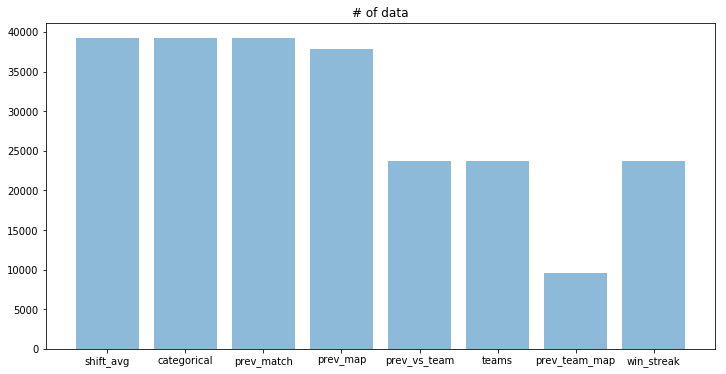

In [560]:
y_pos = np.arange(len(len_of_data))

variables = ['shift_avg', 'categorical', 'prev_match','prev_map', 'prev_vs_team', 'teams' , 'prev_team_map', 'win_streak']


fig, ax = plt.subplots(figsize=(12,6))

plt.bar(y_pos, len_of_data, align='center', alpha=0.5)
plt.xticks(y_pos, variables)
plt.title('# of data')
plt.show()

In [561]:
# widzimy najwieksze spadki po dodaniu zmiennej - mecz przeciwko druzynie (nie zawsze te same druzyny sie spotkykaja), 
# oraz jeszcze wiekszy po meczu przeciwko druzynie na danej mapie 

##### 16. wyniki vs kolejne zmienne
do porownania wybierzemy wyniki dla kolejnych modeli xg boost

In [598]:
scores_list = [scores_df1,scores_df2, scores_df3, scores_df4,scores_df5, scores_df6, scores_df7,scores_df8]

In [600]:
score_xgboost = [x[-1][1] for x in scores_list]

In [602]:
score_xgboost

[54.61, 55.53, 56.61, 56.89, 61.15, 61.82, 57.1, 62.31]

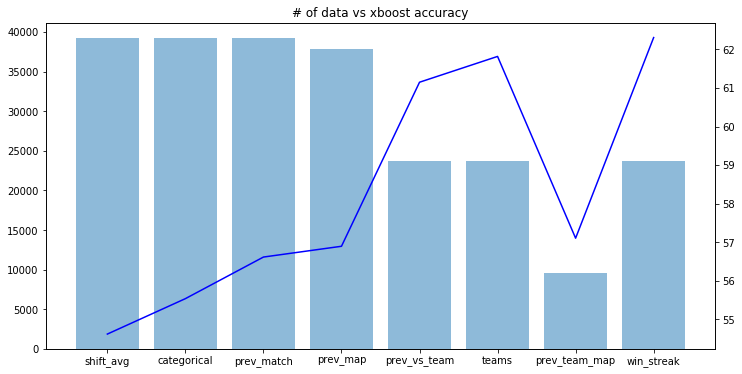

In [606]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax2 =  ax1.twinx()

ax1.bar(y_pos, len_of_data , align='center', alpha=0.5)
ax2.plot(y_pos, score_xgboost, 'b-')

plt.xticks(y_pos, variables)
plt.title('# of data vs xboost accuracy')
plt.show()

In [409]:
y = df1.winner
# X = temp4[lista_zmiennych]
X = df1.drop(columns=['winner'])

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [425]:
train_models(X_train, X_test, y_train, y_test)

Tunuje model: Naiwny Bayes


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'model__alpha': 0.1, 'model__fit_prior': False}:
 mean: 0.5164667808871122, std: 0.00825466100945362,
 fit_time: 0.016666173934936523, score_time: 0.005334615707397461

{'model__alpha': 0.1, 'model__fit_prior': True}:
 mean: 0.5324195697696554, std: 0.009300066559304647,
 fit_time: 0.017336527506510418, score_time: 0.003002166748046875

{'model__alpha': 1, 'model__fit_prior': False}:
 mean: 0.5164287074052922, std: 0.008255714594219483,
 fit_time: 0.014335076014200846, score_time: 0.0036689440409342446

{'model__alpha': 1, 'model__fit_prior': True}:
 mean: 0.5324576432514754, std: 0.009251777741409482,
 fit_time: 0.018000682195027668, score_time: 0.0036668777465820312

{'model__alpha': 10, 'model__fit_prior': False}:
 mean: 0.516504854368932, std: 0.008208522596156934,
 fit_time: 0.01535177230834961, score_time: 0.003001054128011068

{'model__alpha': 10, 'model__fit_prior': True}:
 mean: 0.5323434228060157, std: 0.009344848947832265,
 fit_time: 0.014368375142415365, score_time: 0.0029

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 2}:
 mean: 0.5137635636778983, std: 0.001858204354374607,
 fit_time: 1.464196999867757, score_time: 0.005334615707397461

{'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10}:
 mean: 0.5144869598324767, std: 0.00032752047466367944,
 fit_time: 1.4110020001729329, score_time: 0.005334536234537761

{'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 100}:
 mean: 0.5156291642870741, std: 0.006794809936255375,
 fit_time: 1.1633414427439372, score_time: 0.00466609001159668

{'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}:
 mean: 0.546087949743004, std: 0.0008993726869230979,
 fit_time: 0.14066251118977866, score_time: 0.0036667982737223306

{'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 10}:
 mean: 0.546087949743004, std: 0.0008993726869230979,
 fit_time: 0.13899747530619302, sco

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

{'model__C': 0.1, 'model__penalty': 'l1'}:
 mean: 0.5549971444888635, std: 0.002220699268443544,
 fit_time: 0.3336702187856038, score_time: 0.006663878758748372

{'model__C': 0.1, 'model__penalty': 'l2'}:
 mean: 0.5551494384161432, std: 0.003958177473707848,
 fit_time: 0.35333704948425293, score_time: 0.006996472676595052

{'model__C': 1, 'model__penalty': 'l1'}:
 mean: 0.5529031029887683, std: 0.003959276001174355,
 fit_time: 7.190002361933391, score_time: 0.007998943328857422

{'model__C': 1, 'model__penalty': 'l2'}:
 mean: 0.5525604416523892, std: 0.003045402589883324,
 fit_time: 0.5856685638427734, score_time: 0.009665330251057943

{'model__C': 10, 'model__penalty': 'l1'}:
 mean: 0.5514563106796116, std: 0.002136868867375188,
 fit_time: 49.09567999839783, score_time: 0.007000366846720378

{'model__C': 10, 'model__penalty': 'l2'}:
 mean: 0.5509232819341329, std: 0.001959212690693846,
 fit_time: 0.8773292700449625, score_time: 0.00700529416402181

Tunuje model: SVM


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'a

{'model__kernel': 'linear'}:
 mean: 0.537864077669903, std: 0.0,
 fit_time: 36.2456947962443, score_time: 8.23056181271871

{'model__kernel': 'rbf'}:
 mean: 0.537864077669903, std: 0.0,
 fit_time: 40.84386960665385, score_time: 10.091801007588705

{'model__degree': 2, 'model__kernel': 'poly'}:
 mean: 0.537864077669903, std: 0.0,
 fit_time: 36.61799112955729, score_time: 8.324755271275839

{'model__degree': 3, 'model__kernel': 'poly'}:
 mean: 0.537864077669903, std: 0.0,
 fit_time: 36.55432812372843, score_time: 8.455662886301676

Tunuje model: Las losowy random


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'model__max_features': 0.5, 'model__n_estimators': 100}:
 mean: 0.5337521416333524, std: 0.0022901128104812966,
 fit_time: 43.70530263582865, score_time: 0.17566752433776855

{'model__max_features': 0.5, 'model__n_estimators': 50}:
 mean: 0.5280411193603655, std: 0.001801161419762402,
 fit_time: 22.113149960835774, score_time: 0.09466671943664551

{'model__max_features': 0.5, 'model__n_estimators': 20}:
 mean: 0.5207310108509423, std: 0.0014657054296531565,
 fit_time: 8.781676133473715, score_time: 0.0386656125386556

Tunuje model: Las losowy bagging


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'model__bootstrap': True, 'model__max_samples': 0.5}:
 mean: 0.5156291642870741, std: 0.0030794833815178104,
 fit_time: 5.131179173787435, score_time: 0.058997154235839844

{'model__bootstrap': False, 'model__max_samples': 0.5}:
 mean: 0.5169236626689511, std: 0.007428330473332892,
 fit_time: 6.7273484865824384, score_time: 0.06100241343180338

Tunuje model: XGBoost


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'model__max_depth': 5}:
 mean: 0.5412145440700552, std: 0.004961545896575836,
 fit_time: 6.929288784662883, score_time: 0.05933809280395508

{'model__max_depth': 10}:
 mean: 0.5344374643061108, std: 0.0051723914556228295,
 fit_time: 14.580336888631185, score_time: 0.09399803479512532

{'model__max_depth': 20}:
 mean: 0.5325337902151152, std: 0.0026135164365856368,
 fit_time: 32.77501916885376, score_time: 0.20600557327270508



Testuję:
Naiwny Bayes: 0.5328128623328438
Drzewo decyzyjne: 0.5446394063538688
Regresja logistyczna: 0.5558475689881734
SVM: 0.5371415320398856
Las losowy random: 0.5396150575867666
Las losowy bagging: 0.5102419417175543
XGBoost: 0.5454896807606091


In [422]:
param_grids[6]

{'model__max_depth': [5, 10, 20]}

In [29]:
df_data.groupby('type_of_event').count()

,date,team1main,team2main,map,eventmain,score_team1main,score_team2main,date_time,map_number,match_type,team1_clutches_won,team1_first_kills,team1_p_ADR_1,team1_p_ADR_2,team1_p_ADR_3,team1_p_ADR_4,team1_p_ADR_5,team1_p_asists_1,team1_p_asists_2,team1_p_asists_3,team1_p_asists_4,team1_p_asists_5,team1_p_death_1,team1_p_death_2,team1_p_death_3,team1_p_death_4,team1_p_death_5,team1_p_kast_1,team1_p_kast_2,team1_p_kast_3,team1_p_kast_4,team1_p_kast_5,team1_p_kills_1,team1_p_kills_2,team1_p_kills_3,team1_p_kills_4,team1_p_kills_5,team1_p_rating_1,team1_p_rating_2,team1_p_rating_3,team1_p_rating_4,team1_p_rating_5,team1_player_name_1,team1_player_name_2,team1_player_name_3,team1_player_name_4,team1_player_name_5,team1_rating,team1_score_1half,team1_score_2half,team1side,team2_clutches_won,team2_first_kills,team2_p_ADR_1,team2_p_ADR_2,team2_p_ADR_3,team2_p_ADR_4,team2_p_ADR_5,team2_p_asists_1,team2_p_asists_2,team2_p_asists_3,team2_p_asists_4,team2_p_asists_5,team2_p_death_1,team2_p_death_2,team2_p_death_3,team2_p_death_4,team2_p_death_5,team2_p_kast_1,team2_p_kast_2,team2_p_kast_3,team2_p_kast_4,team2_p_kast_5,team2_p_kills_1,team2_p_kills_2,team2_p_kills_3,team2_p_kills_4,team2_p_kills_5,team2_p_rating_1,team2_p_rating_2,team2_p_rating_3,team2_p_rating_4,team2_p_rating_5,team2_player_name_1,team2_player_name_2,team2_player_name_3,team2_player_name_4,team2_player_name_5,team2_rating,team2_score_1half,team2_score_2half,winner,time_of_day
type_of_event,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BigEvents,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,2797,2797,2797,2797,2797,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,2797,2797,2797,2797,2797,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,2797,2797,2797,2797,2797,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,2797,2797,2797,2797,2797,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376
Lan,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,15109,15109,15109,15109,15109,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,15109,15109,15109,15109,15109,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,15109,15109,15109,15109,15109,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,15109,15109,15109,15109,15109,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302,19302
Majors,584,584,584,584,584,584,584,584,584,584,584,584,355,355,355,355,355,584,584,584,584,584,584,584,584,584,584,355,355,355,355,355,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,355,355,355,355,355,584,584,584,584,584,584,584,584,584,584,355,355,355,355,355,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584
Online,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,38522,38522,38519,38519,38522,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,38531,38531,38531,38531,38529,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,38522,38519,38521,38524,38522,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,38531,38531,38531,38531,38531,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458,46458


In [33]:
teams_list = {}
teams_list = set(df_data2_testowe['team1main'].unique())
teams_list.update(df_data2_testowe['team2main'].unique())

In [34]:
len(teams_list)

3560

In [447]:
# teams_list = ['FaZe']

# for idx,team in enumerate(teams_list):
#     for column in columns_numerical:
#         column_name_new= column+'_u'
#         df_data2_testowe[column_name_new] = df_data2_testowe[column][df_data2_testowe['team1main']==team].shift(1).rolling(5).mean()
#     print(idx)
#     clear_output(wait=True)

0


In [504]:
df_data = df_data.reset_index()

In [517]:
df_data2_testowe[df_data2_testowe.team1main == 'NiP']

,team1main,team2main,map,score_team1main,score_team2main,map_number,match_type,team1_clutches_won,team1_first_kills,team1_p_ADR_1,team1_p_ADR_2,team1_p_ADR_3,team1_p_ADR_4,team1_p_ADR_5,team1_p_asists_1,team1_p_asists_2,team1_p_asists_3,team1_p_asists_4,team1_p_asists_5,team1_p_death_1,team1_p_death_2,team1_p_death_3,team1_p_death_4,team1_p_death_5,team1_p_kast_1,team1_p_kast_2,team1_p_kast_3,team1_p_kast_4,team1_p_kast_5,team1_p_kills_1,team1_p_kills_2,team1_p_kills_3,team1_p_kills_4,team1_p_kills_5,team1_p_rating_1,team1_p_rating_2,team1_p_rating_3,team1_p_rating_4,team1_p_rating_5,team1_rating,team1_score_1half,team1_score_2half,team1side,team2_clutches_won,team2_first_kills,team2_p_ADR_1,team2_p_ADR_2,team2_p_ADR_3,team2_p_ADR_4,team2_p_ADR_5,team2_p_asists_1,team2_p_asists_2,team2_p_asists_3,team2_p_asists_4,team2_p_asists_5,team2_p_death_1,team2_p_death_2,team2_p_death_3,team2_p_death_4,team2_p_death_5,team2_p_kast_1,team2_p_kast_2,team2_p_kast_3,team2_p_kast_4,team2_p_kast_5,team2_p_kills_1,team2_p_kills_2,team2_p_kills_3,team2_p_kills_4,team2_p_kills_5,team2_p_rating_1,team2_p_rating_2,team2_p_rating_3,team2_p_rating_4,team2_p_rating_5,team2_rating,team2_score_1half,team2_score_2half,winner,time_of_day,type_of_event
13857,NiP,mousesports,Cache,19,15,1,Best of 1,2,15,92.9,89.0,71.3,48.1,42.5,5,3,4,2,4,24,21,23,26,25,67.6,79.4,67.6,61.8,50.0,30,29,19,14,11,1.28,1.27,0.93,0.56,0.53,0.91,8,7,t-color,2,19,112.1,85.9,68.2,59.3,50.4,3,5,5,4,5,19,20,21,22,21,79.4,79.4,58.8,79.4,70.6,39,27,22,17,14,1.73,1.36,0.96,0.96,0.79,1.16,7,8,1,Evening,Online
13856,NiP,mousesports,Overpass,16,14,1,Best of 1,4,18,101.5,107.7,65.2,60.0,58.2,6,6,6,3,1,23,21,20,21,18,73.3,76.7,73.3,63.3,50.0,29,26,15,17,16,1.38,1.35,0.96,0.87,0.80,1.07,10,6,ct-color,0,12,80.1,79.5,81.9,79.7,66.4,4,7,8,4,7,20,19,22,23,20,83.3,76.7,66.7,60.0,60.0,22,23,20,19,19,1.16,1.07,1.04,0.96,0.94,1.03,5,9,1,Evening,Online
13836,NiP,Natus Vincere,Mirage,16,10,1,Best of 1,4,17,97.9,92.2,72.5,78.7,56.9,2,5,5,5,1,15,15,13,21,15,92.3,76.9,88.5,65.4,73.1,28,23,15,18,16,1.66,1.37,1.22,1.04,1.04,1.27,10,6,ct-color,2,9,55.0,79.3,66.2,76.1,7.7,1,2,0,5,1,16,20,20,22,8,73.1,73.1,57.7,65.4,76.9,14,20,18,17,1,1.03,1.01,0.89,0.89,0.73,0.83,5,5,1,Evening,Online
14018,NiP,fnatic,Inferno,14,16,1,Best of 1,4,15,77.8,79.2,78.9,87.1,61.8,5,2,6,8,2,17,22,23,21,19,76.7,76.7,73.3,70.0,66.7,21,24,22,21,15,1.17,1.13,1.12,1.06,0.83,1.06,8,8,t-color,4,15,95.3,71.1,77.8,73.9,53.7,4,2,4,9,3,20,19,20,21,23,83.3,63.3,70.0,73.3,60.0,27,23,21,17,14,1.48,1.10,1.03,0.93,0.78,1.06,7,7,0,Afternoon,BigEvents
14017,NiP,fnatic,Inferno,14,16,1,Best of 1,4,15,77.8,79.2,78.9,87.1,61.8,5,2,6,8,2,17,22,23,21,19,76.7,76.7,73.3,70.0,66.7,21,24,22,21,15,1.17,1.13,1.12,1.06,0.83,1.06,8,8,t-color,4,15,95.3,71.1,77.8,73.9,53.7,4,2,4,9,3,20,19,20,21,23,83.3,63.3,70.0,73.3,60.0,27,23,21,17,14,1.48,1.10,1.03,0.93,0.78,1.06,7,7,0,Afternoon,Lan
14013,NiP,Natus Vincere,Overpass,13,16,1,Best of 1,1,10,96.3,94.7,77.1,53.4,67.9,6,1,4,5,6,22,18,24,17,25,72.4,79.3,69.0,69.0,62.1,27,25,17,14,16,1.25,1.23,0.94,0.79,0.78,1.00,8,5,ct-color,3,19,92.3,90.2,83.1,70.3,71.2,6,5,6,1,3,23,21,18,19,18,75.9,65.5,75.9,79.3,65.5,24,23,18,21,19,1.25,1.23,1.17,1.12,1.00,1.15,7,9,0,Afternoon,Lan
14014,NiP,Natus Vincere,Overpass,13,16,1,Best of 1,1,10,96.3,94.7,77.1,53.4,67.9,6,1,4,5,6,22,18,24,17,25,72.4,79.3,69.0,69.0,62.1,27,25,17,14,16,1.25,1.23,0.94,0.79,0.78,1.00,8,5,ct-color,3,19,92.3,90.2,83.1,70.3,71.2,6,5,6,1,3,23,21,18,19,18,75.9,65.5,75.9,79.3,65.5,24,23,18,21,19,1.25,1.23,1.17,1.12,1.00,1.15,7,9,0,Afternoon,BigEvents
14119,NiP,FaZe,Train,16,9,1,Best of 1,0,14,90.1,80.0,79.0,63.0,32.3,4,5,2,3,2,19,22,19,19,19,64.0,60.0,56.0,56.0,52.0,18,15,18,11,9,1.10,0.98,0.96,0.72,0.48,0.85,6,3,t-color,1,11,97.5,92.5,84.4,81.8,68.1,3,4,2,3,6,12,15,13,14,17,76.0,72.0,76.0,76.0,72.0,26,22,20,19,11,1.48,1.37,1.32,1.17,0.84,1.24,9,7,1,Evening,Online
14203,NiP,Virtus.pro,Cache,16,2,1,Best of 1,1,5,73.9,70.3,55.3,68.1,37.1,3,2,1,3,1,16,17,18,17,17,61.1,50.0,50

In [506]:
df_test = df_data[['score_team1main', 'team1main']].shift(1).rolling(5, on='team1main').mean()

In [36]:
df_data2_testowe = df_data2_testowe.sort_index()


In [553]:
df_data_test = df_data2_testowe.groupby('team1main', as_index=False).shift(1)

# UWAGA NIZEJ WAZNE SUPER

In [51]:
# temp = temp_master.groupby('player', sort=False)['won'].apply(lambda x : x.rolling(10, min_periods=1).sum().shift(1))\
#     .reset_index(drop=True)   


temp = df_data2_testowe.groupby('team1main', sort=False)[columns_numerical].apply(lambda x : x.rolling(10).mean().shift(1))

In [52]:
temp2 = temp.dropna()

In [53]:
temp_y = df_data2_testowe['winner']

In [54]:
temp3 = temp2.join(temp_y, how='left')

In [55]:
temp3.winner.sum()/temp3.winner.count()

0.5351011830267539

In [544]:
df_data_test[]

11770     NaN
11771     NaN
11772     NaN
12483     NaN
12484     NaN
12485     NaN
12486     NaN
12532     NaN
12533     NaN
12568     NaN
12569     NaN
12570     NaN
12571     NaN
12572     NaN
12573     NaN
12574     NaN
12575     NaN
12576     NaN
12577     NaN
12578     NaN
12579     NaN
12580     NaN
12630     NaN
12633     NaN
12634     NaN
12635     NaN
12636     NaN
12637     NaN
12641     NaN
12642     NaN
         ... 
69690    14.2
69691    13.4
69692    14.2
69693    14.8
69694    14.8
69695    13.2
69696    13.0
69697    14.0
69698    13.6
69699    11.8
69700    13.4
69701    14.4
69702    14.4
69703    13.8
69704    15.6
69705    16.2
69706    16.2
69707    14.4
69708    13.8
69709    13.8
69710    13.2
69711    12.6
69712    11.8
69713    13.4
69714    13.0
69715    11.2
69716    11.8
69717    13.8
69718    13.8
69719    11.4
Name: score_team1main, Length: 56771, dtype: float64

In [548]:
df_data2_testowe

,team1main,team2main,map,score_team1main,score_team2main,map_number,match_type,team1_clutches_won,team1_first_kills,team1_p_ADR_1,team1_p_ADR_2,team1_p_ADR_3,team1_p_ADR_4,team1_p_ADR_5,team1_p_asists_1,team1_p_asists_2,team1_p_asists_3,team1_p_asists_4,team1_p_asists_5,team1_p_death_1,team1_p_death_2,team1_p_death_3,team1_p_death_4,team1_p_death_5,team1_p_kast_1,team1_p_kast_2,team1_p_kast_3,team1_p_kast_4,team1_p_kast_5,team1_p_kills_1,team1_p_kills_2,team1_p_kills_3,team1_p_kills_4,team1_p_kills_5,team1_p_rating_1,team1_p_rating_2,team1_p_rating_3,team1_p_rating_4,team1_p_rating_5,team1_rating,team1_score_1half,team1_score_2half,team1side,team2_clutches_won,team2_first_kills,team2_p_ADR_1,team2_p_ADR_2,team2_p_ADR_3,team2_p_ADR_4,team2_p_ADR_5,team2_p_asists_1,team2_p_asists_2,team2_p_asists_3,team2_p_asists_4,team2_p_asists_5,team2_p_death_1,team2_p_death_2,team2_p_death_3,team2_p_death_4,team2_p_death_5,team2_p_kast_1,team2_p_kast_2,team2_p_kast_3,team2_p_kast_4,team2_p_kast_5,team2_p_kills_1,team2_p_kills_2,team2_p_kills_3,team2_p_kills_4,team2_p_kills_5,team2_p_rating_1,team2_p_rating_2,team2_p_rating_3,team2_p_rating_4,team2_p_rating_5,team2_rating,team2_score_1half,team2_score_2half,winner,time_of_day,type_of_event
11770,Envy,Titan,Train,11,16,3,Best of 3,4,12,86.3,89.2,76.4,28.0,32.9,3,2,3,2,4,19,20,20,7,13,70.4,63.0,74.1,88.9,77.8,23,19,21,6,6,1.16,1.07,1.07,1.02,0.83,1.01,7,4,ct-color,1,13,99.0,93.3,54.7,74.7,67.9,3,0,1,5,3,16,17,16,18,22,77.8,66.7,66.7,66.7,63.0,27,26,13,15,17,1.39,1.31,0.97,0.94,0.89,1.10,8,8,0,Evening,Online
11771,Titan,Envy,Cache,8,16,3,Best of 3,4,12,86.3,89.2,76.4,28.0,32.9,3,2,3,2,4,19,20,20,7,13,70.4,63.0,74.1,88.9,77.8,23,19,21,6,6,1.16,1.07,1.07,1.02,0.83,1.01,7,4,ct-color,1,13,99.0,93.3,54.7,74.7,67.9,3,0,1,5,3,16,17,16,18,22,77.8,66.7,66.7,66.7,63.0,27,26,13,15,17,1.39,1.31,0.97,0.94,0.89,1.10,8,8,0,Evening,Online
11772,Envy,Titan,Cobblestone,7,16,3,Best of 3,4,12,86.3,89.2,76.4,28.0,32.9,3,2,3,2,4,19,20,20,7,13,70.4,63.0,74.1,88.9,77.8,23,19,21,6,6,1.16,1.07,1.07,1.02,0.83,1.01,7,4,ct-color,1,13,99.0,93.3,54.7,74.7,67.9,3,0,1,5,3,16,17,16,18,22,77.8,66.7,66.7,66.7,63.0,27,26,13,15,17,1.39,1.31,0.97,0.94,0.89,1.10,8,8,0,Evening,Online
12483,ex-USSR,enable,Dust2,16,7,2,Best of 3,0,12,101.6,84.6,80.7,74.9,65.8,4,4,5,5,4,17,11,10,13,12,78.3,73.9,73.9,65.2,78.3,20,20,17,16,15,1.47,1.27,1.25,1.12,1.06,1.23,9,7,ct-color,1,11,82.6,64.7,59.0,76.0,34.2,5,1,1,2,0,17,18,18,18,17,60.9,60.9,65.2,52.2,39.1,14,13,15,13,7,1.00,0.95,0.82,0.78,0.49,0.81,6,1,1,Evening,Online
12484,enable,ex-USSR,Cache,16,12,2,Best of 3,0,12,101.6,84.6,80.7,74.9,65.8,4,4,5,5,4,17,11,10,13,12,78.3,73.9,73.9,65.2,78.3,20,20,17,16,15,1.47,1.27,1.25,1.12,1.06,1.23,9,7,ct-color,1,11,82.6,64.7,59.0,76.0,34.2,5,1,1,2,0,17,18,18,18,17,60.9,60.9,65.2,52.2,39.1,14,13,15,13,7,1.00,0.95,0.82,0.78,0.49,0.81,6,1,1,Evening,Online
12485,EYES ON U,enable,Inferno,9,16,1,Best of 1,3,14,114.6,82.4,71.9,76.8,62.4,9,3,5,6,5,18,15,15,13,15,80.0,76.0,84.0,84.0,68.0,28,22,16,18,13,1.59,1.30,1.29,1.24,0.89,1.26,7,9,t-color,2,11,69.8,77.6,63.6,68.8,59.0,3,2,2,4,3,17,20,16,22,22,76.0,64.0,68.0,72.0,48.0,17,18,14,14,13,0.99,0.91,0.89,0.77,0.61,0.83,8,1,0,Evening,Online
12486,Nostalgie,EYES ON U,Mirage,14,16,1,Best of 3,0,14,109.6,82.0,91.4,67.1,58.3,7,7,8,3,2,20,19,17,20,23,83.3,73.3,66.7,63.3,66.7,32,22,21,16,19,1.68,1.20,1.18,0.88,0.84,1.16,10,6,t-color,2,16,103.4,79.7,77.4,66.3,40.5,1,4,3,6,0,24,23,22,20,21,70.0,63.3,56.7,66.7,43.3,30,21,17,16,14,1.37,0.97,0.91,0.85,0.66,0.95,5,9,0,Evening,Online
12532,KoN Finland,KoN Sweden,Inferno,7,16,1,Best of 1,0,17,110.5,90.0,72.4,81.4,57.7,10,5,2,2,0,14,10,11,14,10,91.3,78.3,82.6,82.6,69.6,21,20,17,19,13,1.61,1.47,1.35,1.34,1.06,1.36,11,5,t-color,1,6,86.7,61.8,55.4,71.6,47.8,3,2,3,2,1,18,17,17,19,19,60.9,56.5,69.6,60.9,34.8,16,14,11,11,6,0.91,0.75,0.72,0.71,0.42,0.70,4,3,0,Evening,Online
12533,KoN Finland,KoN Norway,Mirage,16,5,1,Best of 1,0,6,77.4,68.6,60.6,58.8,59.6,0,2,2,5,2,18,16,17,18,17,66.7,52.4,52.4,

In [545]:
df_data_test = pd.DataFrame(df_data_test).reset_index()


In [546]:
df_data_test[df_data_test['index'] == 69010]

,index,score_team1main
56061,69010,14.4


In [458]:
df_data[df_data['team1main']=='NiP']

,date,team1main,team2main,map,eventmain,score_team1main,score_team2main,date_time,map_number,match_type,team1_clutches_won,team1_first_kills,team1_p_ADR_1,team1_p_ADR_2,team1_p_ADR_3,team1_p_ADR_4,team1_p_ADR_5,team1_p_asists_1,team1_p_asists_2,team1_p_asists_3,team1_p_asists_4,team1_p_asists_5,team1_p_death_1,team1_p_death_2,team1_p_death_3,team1_p_death_4,team1_p_death_5,team1_p_kast_1,team1_p_kast_2,team1_p_kast_3,team1_p_kast_4,team1_p_kast_5,team1_p_kills_1,team1_p_kills_2,team1_p_kills_3,team1_p_kills_4,team1_p_kills_5,team1_p_rating_1,team1_p_rating_2,team1_p_rating_3,team1_p_rating_4,team1_p_rating_5,team1_player_name_1,team1_player_name_2,team1_player_name_3,team1_player_name_4,team1_player_name_5,team1_rating,team1_score_1half,team1_score_2half,team1side,team2_clutches_won,team2_first_kills,team2_p_ADR_1,team2_p_ADR_2,team2_p_ADR_3,team2_p_ADR_4,team2_p_ADR_5,team2_p_asists_1,team2_p_asists_2,team2_p_asists_3,team2_p_asists_4,team2_p_asists_5,team2_p_death_1,team2_p_death_2,team2_p_death_3,team2_p_death_4,team2_p_death_5,team2_p_kast_1,team2_p_kast_2,team2_p_kast_3,team2_p_kast_4,team2_p_kast_5,team2_p_kills_1,team2_p_kills_2,team2_p_kills_3,team2_p_kills_4,team2_p_kills_5,team2_p_rating_1,team2_p_rating_2,team2_p_rating_3,team2_p_rating_4,team2_p_rating_5,team2_player_name_1,team2_player_name_2,team2_player_name_3,team2_player_name_4,team2_player_name_5,team2_rating,team2_score_1half,team2_score_2half,winner,time_of_day,type_of_event
23,2012-10-09,NiP,Publiclir.se,Dust2,ESWC 2012 Nordic Qualifier,16,12,2012-10-09 20:00,2,Best of 3,0,13,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,7,5,10,3,3,NaN,NaN,NaN,NaN,NaN,22,17,20,15,8,2.14,1.65,1.59,1.51,1.24,friberg,f0rest,Xizt,Fifflaren,GeT_RiGhT,1.63,14,2,ct-color,0,4,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,17,16,17,16,16,NaN,NaN,NaN,NaN,NaN,11,7,4,3,3,0.61,0.39,0.20,0.20,0.20,zneel,pita,pronax,rdl,lidde,0.32,1,0,1,Evening,Online
22,2012-10-09,NiP,Publiclir.se,Mirage,ESWC 2012 Nordic Qualifier,16,1,2012-10-09 20:00,2,Best of 3,0,13,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,7,5,10,3,3,NaN,NaN,NaN,NaN,NaN,22,17,20,15,8,2.14,1.65,1.59,1.51,1.24,friberg,f0rest,Xizt,Fifflaren,GeT_RiGhT,1.63,14,2,ct-color,0,4,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,17,16,17,16,16,NaN,NaN,NaN,NaN,NaN,11,7,4,3,3,0.61,0.39,0.20,0.20,0.20,zneel,pita,pronax,rdl,lidde,0.32,1,0,1,Evening,Online
1,2012-10-11,NiP,HastaLaVista,Inferno,ESWC 2012 Nordic Qualifier,16,8,2012-10-11 20:00,2,Best of 3,1,14,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,7,9,4,11,8,NaN,NaN,NaN,NaN,NaN,23,20,14,16,12,1.92,1.55,1.53,1.32,1.09,f0rest,Xizt,Fifflaren,friberg,GeT_RiGhT,1.49,12,4,ct-color,0,5,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,17,17,16,18,18,NaN,NaN,NaN,NaN,NaN,11,8,6,7,7,0.69,0.47,0.45,0.44,0.38,ruggah,cajunb,Pimp,MSL,zn0pe,0.49,3,0,1,Evening,Online
0,2012-10-11,NiP,HastaLaVista,Train,ESWC 2012 Nordic Qualifier,16,3,2012-10-11 20:00,2,Best of 3,1,14,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,7,9,4,11,8,NaN,NaN,NaN,NaN,NaN,23,20,14,16,12,1.92,1.55,1.53,1.32,1.09,f0rest,Xizt,Fifflaren,friberg,GeT_RiGhT,1.49,12,4,ct-color,0,5,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,17,17,16,18,18,NaN,NaN,NaN,NaN,NaN,11,8,6,7,7,0.69,0.47,0.45,0.44,0.38,ruggah,cajunb,Pimp,MSL,zn0pe,0.49,3,0,1,Evening,Online
166,2012-11-02,NiP,ProGaming.TD,Nuke,ESWC 2012,16,13,2012-11-02 11:45,1,Best of 1,1,21,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,17,21,16,22,20,NaN,NaN,NaN,NaN,NaN,24,27,22,22,12,1.31,1.24,1.24,1.03,0.62,friberg,Xizt,f0rest,GeT_RiGhT,Fifflaren,1.09,9,7,ct-color,0,8,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,21,22,21,20,23,NaN,NaN,NaN,NaN,NaN,25,24,17,16,14,1.21,1.17,0.81,0.75,0.67,rkz,zqkS,cogu,zakk,steel,0.92,6,7,1,Morning,BigEvents
165,2012-11-02,NiP,ProGaming.TD,Nuke,ESWC 2012,16,13,2012-11-02 11:45,1,Best of 1,1,21,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,17,21,16,22,20,NaN,NaN,NaN,NaN,NaN,24,27,22,22,12,1.31,1.24,1.24,1.03,0.62,friberg,Xizt,f0rest,GeT_RiGhT,Fifflaren,1.09,9,7,ct-color,0,8,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,21,22,21,20,23,NaN,NaN,NaN,NaN,NaN,25,24,17,16,14,1.21,1.17,0.81,0.75,0.67,rkz,zqkS,cogu,zakk,steel,0.92,6,7,1,Morning,Lan
162,2012-11-02,NiP,Ar

1. wyczszczenie nazw map OK
2. zrobienie tego ktory wygral lub zremisowal OK
3. wielkosc turnieju
4. date_time - zamien na rano wieczorem poludnie w nocy
6. srednia_ratingow???  tu zaras sie cos wymysli
7. analiza ktory team na ktorym wygrywa czesciej - tzn ten co pierwszy z mapa\
8. średnie wyniki z ostatnich 10 spotkan dla kazdej z druzyn
9. srednie wyniki z ostaniego spotkania na tej mapie
10. srednie wyniki z ostatnich 10 spotkan na tej mapie
11. srednie wyniki ze spotkan 10 przeciwko
12. srednie wyniki ze spotkan na tej mapie wszystkie druzyny
13. srednie wyniki dla 1 strony, srednie wyniki dla 2 strony
14. srednie wyniki z pierwszej i 2 polowy ze wzgledu na zaczynana strone i mape


MOZE WYKORZYSTAC CZAS JAKO WAGE


PAMIETAJ o REQUIREMENTSACH

In [14]:
len(df_data.team1_player_name_1.unique())

5401

In [21]:
df_data[['score_team1main','team1main']].rolling(10, min_periods=1, on='team1main').sum()

,score_team1main,team1main
0,16.0,NiP
1,32.0,NiP
2,48.0,NiP
3,64.0,NiP
4,66.0,Red Dead
5,82.0,mousesports
6,98.0,mousesports
7,105.0,Tt Dragons
8,112.0,Tt Dragons
9,128.0,mousesports


In [162]:
categories, mapping_index = pd.factorize(temp4['team1main'])

In [163]:
categories

array([   0,    0,    1, ...,  416,  784, 1467], dtype=int64)

,score_team1main,score_team2main,team1_clutches_won,team1_first_kills,team1_p_ADR_1,team1_p_ADR_2,team1_p_ADR_3,team1_p_ADR_4,team1_p_ADR_5,team1_p_asists_1,team1_p_asists_2,team1_p_asists_3,team1_p_asists_4,team1_p_asists_5,team1_p_death_1,team1_p_death_2,team1_p_death_3,team1_p_death_4,team1_p_death_5,team1_p_kast_1,team1_p_kast_2,team1_p_kast_3,team1_p_kast_4,team1_p_kast_5,team1_p_kills_1,team1_p_kills_2,team1_p_kills_3,team1_p_kills_4,team1_p_kills_5,team1_p_rating_1,team1_p_rating_2,team1_p_rating_3,team1_p_rating_4,team1_p_rating_5,team1_rating,team1_score_1half,team1_score_2half,team2_clutches_won,team2_first_kills,team2_p_ADR_1,team2_p_ADR_2,team2_p_ADR_3,team2_p_ADR_4,team2_p_ADR_5,team2_p_asists_1,team2_p_asists_2,team2_p_asists_3,team2_p_asists_4,team2_p_asists_5,team2_p_death_1,team2_p_death_2,team2_p_death_3,team2_p_death_4,team2_p_death_5,team2_p_kast_1,team2_p_kast_2,team2_p_kast_3,team2_p_kast_4,team2_p_kast_5,team2_p_kills_1,team2_p_kills_2,team2_p_kills_3,team2_p_kills_4,team2_p_kills_5,team2_p_rating_1,team2_p_rating_2,team2_p_rating_3,team2_p_rating_4,team2_p_rating_5,team2_rating,team2_score_1half,team2_score_2half,winner,map_number,map_Cache,map_Cobblestone,map_Dust2,map_Inferno,map_Mirage,map_Nuke,map_Overpass,map_Train,map_Vertigo,match_type_Best of 1,match_type_Best of 2,match_type_Best of 3,match_type_Best of 5,match_type_TBA,team1side_ct-color,team1side_t-color,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,type_of_event_BigEvents,type_of_event_Lan,type_of_event_Majors,type_of_event_Online
12797,13.6,13.8,0.6,14.6,80.62,79.44,76.96,74.64,52.50,2.4,4.4,6.2,2.4,3.4,17.0,19.0,19.4,19.6,18.2,72.34,70.60,68.34,60.98,66.96,21.8,18.8,18.6,18.4,14.4,1.214,1.094,1.054,0.970,0.828,1.032,6.2,7.2,1.6,13.4,86.44,83.00,75.68,63.18,59.26,5.0,4.4,4.0,3.8,2.2,20.6,18.4,16.6,17.2,19.4,69.68,72.24,69.46,69.12,62.16,22.0,21.4,19.4,15.8,14.6,1.224,1.152,1.084,0.982,0.788,1.046,8.8,6.0,1,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
12798,14.2,13.3,0.6,15.8,79.80,80.72,78.99,75.83,55.76,2.5,5.1,6.4,2.3,3.6,17.0,19.5,20.1,19.3,18.2,72.28,72.10,69.59,63.87,68.21,22.4,19.2,19.5,19.6,15.6,1.212,1.112,1.076,1.027,0.871,1.060,6.2,8.1,1.6,12.8,86.49,82.19,75.02,64.67,58.10,5.3,4.2,4.0,3.9,2.0,21.3,19.4,17.4,18.6,19.8,68.84,69.75,68.71,67.50,60.63,21.8,21.7,19.3,16.6,14.7,1.180,1.109,1.055,0.964,0.779,1.017,8.8,5.7,1,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
12799,14.8,12.8,0.6,17.0,78.98,82.00,81.02,77.02,59.02,2.6,5.8,6.6,2.2,3.8,17.0,20.0,20.8,19.0,18.2,72.22,73.60,70.84,66.76,69.46,23.0,19.6,20.4,20.8,16.8,1.210,1.130,1.098,1.084,0.914,1.088,6.2,9.0,1.6,12.2,86.54,81.38,74.36,66.16,56.94,5.6,4.0,4.0,4.0,1.8,22.0,20.4,18.2,20.0,20.2,68.00,67.26,67.96,65.88,59.10,21.6,22.0,19.2,17.4,14.8,1.136,1.066,1.026,0.946,0.770,0.988,8.8,5.4,0,3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
12800,13.9,12.8,0.6,17.7,77.72,82.39,81.51,77.82,58.42,2.6,6.3,6.2,2.1,3.3,17.4,19.9,21.3,19.4,18.0,70.15,72.91,69.46,67.10,68.77,22.7,19.3,20.7,20.9,16.8,1.187,1.125,1.089,1.080,0.906,1.079,5.7,9.5,1.6,11.6,85.96,80.53,74.54,68.40,58.69,5.9,3.7,4.0,4.2,1.5,21.8,20.3,18.1,20.6,19.7,67.65,66.92,67.27,66.23,59.79,21.5,22.0,18.9,18.1,15.5,1.127,1.059,1.022,0.953,0.805,0.992,9.3,4.9,0,3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
12804,12.0,16.2,1.0,12.6,77.30,73.26,65.36,78.14,61.92,4.0,4.0,3.8,2.2,3.0,18.4,18.0,20.0,20.2,19.0,73.36,67.44,71.30,64.18,57.54,19.8,18.4,15.6,18.0,14.8,1.072,1.006,0.942,0.922,0.814,0.952,6.6,5.6,1.6,14.4,98.86,89.50,79.96,65.16,52.18,4.0,5.0,3.0,2.0,3.4,16.4,16.8,18.0,16.2,19.2,74.32,74.26,76.24,65.88,63.02,25.8,22.2,19.8,15.0,12.4,1.524,1.304,1.168,0.946,0.772,1.142,8.4,6.8,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
12805,10.8,16.2,0.9,12.0,76.78,73.87,64.15,74.93,59.14,3.7,4.0,3.9,2.0,2.7,18.1,17.9,19.6,19.6,18.5,72.36,66.44,70.41,63.41,56.54,18.9,17.2,14.2,16.6,13.5,1.040,0.959,0.897,0.873,0.758,0.906,5.9,4.9,1.5,13.9,100.11,91.57,81.20,66.47,54.54,4.1,5.2,3.0,2.0

In [164]:
temp4['team1index'] = categories

In [165]:
try:
    print(mapping_index.get_loc('Envy'))
except:
    print(np.nan)

44


In [166]:

def teams_categories_map(row):
    try:
        index = mapping_index.get_loc(row['team2main'])
    except:
        index = np.nan
    return index


temp4['team2index'] = temp4.apply(lambda x: teams_categories_map(x), axis=1)

In [167]:
temp4 =temp4.dropna()

In [174]:
temp4 = temp4.drop(columns=['team1main','team2main'])

In [180]:
temp4

,score_team1main,score_team2main,team1_clutches_won,team1_first_kills,team1_p_ADR_1,team1_p_ADR_2,team1_p_ADR_3,team1_p_ADR_4,team1_p_ADR_5,team1_p_asists_1,team1_p_asists_2,team1_p_asists_3,team1_p_asists_4,team1_p_asists_5,team1_p_death_1,team1_p_death_2,team1_p_death_3,team1_p_death_4,team1_p_death_5,team1_p_kast_1,team1_p_kast_2,team1_p_kast_3,team1_p_kast_4,team1_p_kast_5,team1_p_kills_1,team1_p_kills_2,team1_p_kills_3,team1_p_kills_4,team1_p_kills_5,team1_p_rating_1,team1_p_rating_2,team1_p_rating_3,team1_p_rating_4,team1_p_rating_5,team1_rating,team1_score_1half,team1_score_2half,team2_clutches_won,team2_first_kills,team2_p_ADR_1,team2_p_ADR_2,team2_p_ADR_3,team2_p_ADR_4,team2_p_ADR_5,team2_p_asists_1,team2_p_asists_2,team2_p_asists_3,team2_p_asists_4,team2_p_asists_5,team2_p_death_1,team2_p_death_2,team2_p_death_3,team2_p_death_4,team2_p_death_5,team2_p_kast_1,team2_p_kast_2,team2_p_kast_3,team2_p_kast_4,team2_p_kast_5,team2_p_kills_1,team2_p_kills_2,team2_p_kills_3,team2_p_kills_4,team2_p_kills_5,team2_p_rating_1,team2_p_rating_2,team2_p_rating_3,team2_p_rating_4,team2_p_rating_5,team2_rating,team2_score_1half,team2_score_2half,winner,map_number,map_Cache,map_Cobblestone,map_Dust2,map_Inferno,map_Mirage,map_Nuke,map_Overpass,map_Train,map_Vertigo,match_type_Best of 1,match_type_Best of 2,match_type_Best of 3,match_type_Best of 5,match_type_TBA,team1side_ct-color,team1side_t-color,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,type_of_event_BigEvents,type_of_event_Lan,type_of_event_Majors,type_of_event_Online,team1index,team2index
12797,13.6,13.8,0.6,14.6,80.62,79.44,76.96,74.64,52.50,2.4,4.4,6.2,2.4,3.4,17.0,19.0,19.4,19.6,18.2,72.34,70.60,68.34,60.98,66.96,21.8,18.8,18.6,18.4,14.4,1.214,1.094,1.054,0.970,0.828,1.032,6.2,7.2,1.6,13.4,86.44,83.00,75.68,63.18,59.26,5.0,4.4,4.0,3.8,2.2,20.6,18.4,16.6,17.2,19.4,69.68,72.24,69.46,69.12,62.16,22.0,21.4,19.4,15.8,14.6,1.224,1.152,1.084,0.982,0.788,1.046,8.8,6.0,1,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,44.0
12798,14.2,13.3,0.6,15.8,79.80,80.72,78.99,75.83,55.76,2.5,5.1,6.4,2.3,3.6,17.0,19.5,20.1,19.3,18.2,72.28,72.10,69.59,63.87,68.21,22.4,19.2,19.5,19.6,15.6,1.212,1.112,1.076,1.027,0.871,1.060,6.2,8.1,1.6,12.8,86.49,82.19,75.02,64.67,58.10,5.3,4.2,4.0,3.9,2.0,21.3,19.4,17.4,18.6,19.8,68.84,69.75,68.71,67.50,60.63,21.8,21.7,19.3,16.6,14.7,1.180,1.109,1.055,0.964,0.779,1.017,8.8,5.7,1,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,44.0
12800,13.9,12.8,0.6,17.7,77.72,82.39,81.51,77.82,58.42,2.6,6.3,6.2,2.1,3.3,17.4,19.9,21.3,19.4,18.0,70.15,72.91,69.46,67.10,68.77,22.7,19.3,20.7,20.9,16.8,1.187,1.125,1.089,1.080,0.906,1.079,5.7,9.5,1.6,11.6,85.96,80.53,74.54,68.40,58.69,5.9,3.7,4.0,4.2,1.5,21.8,20.3,18.1,20.6,19.7,67.65,66.92,67.27,66.23,59.79,21.5,22.0,18.9,18.1,15.5,1.127,1.059,1.022,0.953,0.805,0.992,9.3,4.9,0,3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,2,29.0
12804,12.0,16.2,1.0,12.6,77.30,73.26,65.36,78.14,61.92,4.0,4.0,3.8,2.2,3.0,18.4,18.0,20.0,20.2,19.0,73.36,67.44,71.30,64.18,57.54,19.8,18.4,15.6,18.0,14.8,1.072,1.006,0.942,0.922,0.814,0.952,6.6,5.6,1.6,14.4,98.86,89.50,79.96,65.16,52.18,4.0,5.0,3.0,2.0,3.4,16.4,16.8,18.0,16.2,19.2,74.32,74.26,76.24,65.88,63.02,25.8,22.2,19.8,15.0,12.4,1.524,1.304,1.168,0.946,0.772,1.142,8.4,6.8,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,3,2.0
12805,10.8,16.2,0.9,12.0,76.78,73.87,64.15,74.93,59.14,3.7,4.0,3.9,2.0,2.7,18.1,17.9,19.6,19.6,18.5,72.36,66.44,70.41,63.41,56.54,18.9,17.2,14.2,16.6,13.5,1.040,0.959,0.897,0.873,0.758,0.906,5.9,4.9,1.5,13.9,100.11,91.57,81.20,66.47,54.54,4.1,5.2,3.0,2.0,3.6,15.5,15.9,16.7,14.7,17.6,77.09,76.37,78.01,67.99,66.24,25.0,21.7,19.4,14.9,12.4,1.573,1.349,1.216,1.014,0.847,1.199,9.1,6.3,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,3,2.0
12806,12.4,9.8,1.2,12.4,86.32,85.26,75.12,71.08,56.34,2.2,5.6,2.2,2.6,4.4,17.2,17.8,17.8,20.0,20.2,76.78,71.56,62.32,63.66,66.26,22.0,17.6,19.8,14.8,11.8,1.270,1.140,1.064,0.870,0.802,1.032,7.2,4.4,

In [161]:
temp4 = temp3.merge(df_data[['team1main','team2main']], left_index=True, right_index=True, how='left')

In [49]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

from sklearn.metrics import accuracy_score

In [322]:
y = temp4.winner
# X = temp4[lista_zmiennych]
X = temp4.drop(columns=['winner'])

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [324]:
names = np.array(["Naiwny Bayes", "Drzewo decyzyjne", "Regresja logistyczna", "SVM",'Las losowy random', 'Las losowy bagging'])
models = [[("model", MultinomialNB())],
         [("model", DecisionTreeClassifier())],
         [("scaler", MaxAbsScaler()), ("model", LogisticRegression())],
         [("scaler", MaxAbsScaler()),("model", SVC())],
         [("model", RandomForestClassifier())],
         [("model", BaggingClassifier())]]

param_grids = [{"model__alpha": [0.1, 1, 10], "model__fit_prior": [False, True]},
               {"model__criterion": ["gini", "entropy"], "model__min_samples_split": [2, 10, 100], "model__max_depth": [None, 2, 10, 100]}, 
               {"model__penalty": ["l1", "l2"], "model__C": [0.1, 1, 10]},
              [{"model__kernel": ["linear"]},
              {"model__kernel": ["rbf"]},
              {"model__kernel": ["poly"], "model__degree": [2, 3]}],
               {"model__n_estimators" : [100,50,20], "model__max_features" : [0.5]},
               {"model__max_samples" : [0.5], "model__bootstrap" : [True, False]}
              ]



uses=np.array([True, True, True, True, True, True])


if len(names) != len(models) or len(models) != len(param_grids):
    raise ValueError("Listy nie mają tej samej długości!")

best_models = []

for use, name, pipe, params in zip(uses, names, models, param_grids):
    print(f"Tunuje model: {name}")
    if use==False:
        print("pomijamy")
    else:
        pipeline = Pipeline(pipe)
        gs = GridSearchCV(estimator=pipeline, param_grid=params)
        gs.fit(X_train, y_train)
        for mean, std, param, fit_time, score_time in zip(gs.cv_results_["mean_test_score"],
                                    gs.cv_results_["std_test_score"],
                                    gs.cv_results_["params"],
                                    gs.cv_results_["mean_fit_time"],
                                    gs.cv_results_["mean_score_time"]):
            print(f"{param}:\n mean: {mean}, std: {std},\n fit_time: {fit_time}, score_time: {score_time}\n")
        best_models.append(gs.best_estimator_)


        
        
print("\n\nTestuję:")
for name, best_model in zip(names[uses], best_models):
    print(f"{name}: {accuracy_score(best_model.predict(X_test), y_test)}")

Tunuje model: Naiwny Bayes


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'model__alpha': 0.1, 'model__fit_prior': False}:
 mean: 0.5049830124575312, std: 0.004071019635913216,
 fit_time: 0.015998204549153645, score_time: 0.006336291631062825

{'model__alpha': 0.1, 'model__fit_prior': True}:
 mean: 0.5043035107587769, std: 0.004479411330899437,
 fit_time: 0.017000595728556316, score_time: 0.005001465479532878

{'model__alpha': 1, 'model__fit_prior': False}:
 mean: 0.5049830124575312, std: 0.004071019635913216,
 fit_time: 0.024000088373819988, score_time: 0.005000114440917969

{'model__alpha': 1, 'model__fit_prior': True}:
 mean: 0.5043035107587769, std: 0.004479411330899437,
 fit_time: 0.01599907875061035, score_time: 0.004671255747477214

{'model__alpha': 10, 'model__fit_prior': False}:
 mean: 0.5049263873159683, std: 0.003995102458370886,
 fit_time: 0.019330739974975586, score_time: 0.0043337345123291016

{'model__alpha': 10, 'model__fit_prior': True}:
 mean: 0.5044167610419026, std: 0.0044528428329979166,
 fit_time: 0.01699972152709961, score_time: 0.004

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 2}:
 mean: 0.6023782559456399, std: 0.004224592576967801,
 fit_time: 0.7070002555847168, score_time: 0.006667772928873698

{'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10}:
 mean: 0.5962061155152888, std: 0.004605390329690265,
 fit_time: 0.7049992084503174, score_time: 0.00599980354309082

{'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 100}:
 mean: 0.6129105322763306, std: 0.007187260179171153,
 fit_time: 0.5519985357920328, score_time: 0.005998452504475911

{'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}:
 mean: 0.6179501698754247, std: 0.005565847445301583,
 fit_time: 0.09799957275390625, score_time: 0.005333741505940755

{'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 10}:
 mean: 0.6179501698754247, std: 0.005565847445301583,
 fit_time: 0.10266590118408203, score

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

{'model__C': 0.1, 'model__penalty': 'l1'}:
 mean: 0.6146092865232163, std: 0.007004092636158038,
 fit_time: 0.31499656041463214, score_time: 0.008667230606079102

{'model__C': 0.1, 'model__penalty': 'l2'}:
 mean: 0.6115515288788222, std: 0.004555384189360661,
 fit_time: 0.4136703809102376, score_time: 0.008329550425211588

{'model__C': 1, 'model__penalty': 'l1'}:
 mean: 0.6109286523216308, std: 0.0037323971815574615,
 fit_time: 5.480042378107707, score_time: 0.011003653208414713

{'model__C': 1, 'model__penalty': 'l2'}:
 mean: 0.6108154020385052, std: 0.00504323098681679,
 fit_time: 0.7186686992645264, score_time: 0.008333126703898111

{'model__C': 10, 'model__penalty': 'l1'}:
 mean: 0.609682899207248, std: 0.004324192679512112,
 fit_time: 35.03257624308268, score_time: 0.00899974505106608

{'model__C': 10, 'model__penalty': 'l2'}:
 mean: 0.6095696489241224, std: 0.00416497554394735,
 fit_time: 1.428000847498576, score_time: 0.008000691731770834

Tunuje model: SVM


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'a

{'model__kernel': 'linear'}:
 mean: 0.6179501698754247, std: 0.005565847445301583,
 fit_time: 15.890401283899942, score_time: 4.075230360031128

{'model__kernel': 'rbf'}:
 mean: 0.6179501698754247, std: 0.005565847445301583,
 fit_time: 17.983365694681805, score_time: 4.660337368647258

{'model__degree': 2, 'model__kernel': 'poly'}:
 mean: 0.6179501698754247, std: 0.005565847445301583,
 fit_time: 16.055304924647015, score_time: 4.011002779006958

{'model__degree': 3, 'model__kernel': 'poly'}:
 mean: 0.6179501698754247, std: 0.005565847445301583,
 fit_time: 16.40896733601888, score_time: 4.337333599726359

Tunuje model: Las losowy random


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'model__max_features': 0.5, 'model__n_estimators': 100}:
 mean: 0.6494903737259343, std: 0.005618584945384823,
 fit_time: 21.543973366419475, score_time: 0.11900003751118977

{'model__max_features': 0.5, 'model__n_estimators': 50}:
 mean: 0.6411664779161947, std: 0.0030931360201013544,
 fit_time: 11.096980889638266, score_time: 0.057702223459879555

{'model__max_features': 0.5, 'model__n_estimators': 20}:
 mean: 0.6300679501698754, std: 0.003866280388136932,
 fit_time: 4.3218575318654375, score_time: 0.033329010009765625

Tunuje model: Las losowy bagging


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'model__bootstrap': True, 'model__max_samples': 0.5}:
 mean: 0.6257644394110985, std: 0.003105653880147359,
 fit_time: 2.500999689102173, score_time: 0.05066665013631185

{'model__bootstrap': False, 'model__max_samples': 0.5}:
 mean: 0.6276896942242356, std: 0.001633987406619824,
 fit_time: 3.182335535685221, score_time: 0.05133342742919922



Testuję:
Naiwny Bayes: 0.5017818140016094
Drzewo decyzyjne: 0.6600758707897459
Regresja logistyczna: 0.6183469364294747
SVM: 0.6191516266237499
Las losowy random: 0.6508794114266008
Las losowy bagging: 0.6323715369582711


In [63]:
from xgboost import XGBClassifier

In [62]:
temp3.to_pickle('temp.pkl')

In [317]:
model = XGBClassifier(max_depth=20)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [318]:
y_pred = model.predict(X_test)

In [319]:
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 64.34%


In [218]:
X

,score_team1main,score_team2main,team1_clutches_won,team1_first_kills,team1_p_ADR_1,team1_p_ADR_2,team1_p_ADR_3,team1_p_ADR_4,team1_p_ADR_5,team1_p_asists_1,team1_p_asists_2,team1_p_asists_3,team1_p_asists_4,team1_p_asists_5,team1_p_death_1,team1_p_death_2,team1_p_death_3,team1_p_death_4,team1_p_death_5,team1_p_kast_1,team1_p_kast_2,team1_p_kast_3,team1_p_kast_4,team1_p_kast_5,team1_p_kills_1,team1_p_kills_2,team1_p_kills_3,team1_p_kills_4,team1_p_kills_5,team1_p_rating_1,team1_p_rating_2,team1_p_rating_3,team1_p_rating_4,team1_p_rating_5,team1_rating,team1_score_1half,team1_score_2half,team2_clutches_won,team2_first_kills,team2_p_ADR_1,team2_p_ADR_2,team2_p_ADR_3,team2_p_ADR_4,team2_p_ADR_5,team2_p_asists_1,team2_p_asists_2,team2_p_asists_3,team2_p_asists_4,team2_p_asists_5,team2_p_death_1,team2_p_death_2,team2_p_death_3,team2_p_death_4,team2_p_death_5,team2_p_kast_1,team2_p_kast_2,team2_p_kast_3,team2_p_kast_4,team2_p_kast_5,team2_p_kills_1,team2_p_kills_2,team2_p_kills_3,team2_p_kills_4,team2_p_kills_5,team2_p_rating_1,team2_p_rating_2,team2_p_rating_3,team2_p_rating_4,team2_p_rating_5,team2_rating,team2_score_1half,team2_score_2half,map_number,map_Cache,map_Cobblestone,map_Dust2,map_Inferno,map_Mirage,map_Nuke,map_Overpass,map_Train,map_Vertigo,match_type_Best of 1,match_type_Best of 2,match_type_Best of 3,match_type_Best of 5,match_type_TBA,team1side_ct-color,team1side_t-color,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,type_of_event_BigEvents,type_of_event_Lan,type_of_event_Majors,type_of_event_Online,team1index,team2index
12797,13.6,13.8,0.6,14.6,80.62,79.44,76.96,74.64,52.50,2.4,4.4,6.2,2.4,3.4,17.0,19.0,19.4,19.6,18.2,72.34,70.60,68.34,60.98,66.96,21.8,18.8,18.6,18.4,14.4,1.214,1.094,1.054,0.970,0.828,1.032,6.2,7.2,1.6,13.4,86.44,83.00,75.68,63.18,59.26,5.0,4.4,4.0,3.8,2.2,20.6,18.4,16.6,17.2,19.4,69.68,72.24,69.46,69.12,62.16,22.0,21.4,19.4,15.8,14.6,1.224,1.152,1.084,0.982,0.788,1.046,8.8,6.0,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,44.0
12798,14.2,13.3,0.6,15.8,79.80,80.72,78.99,75.83,55.76,2.5,5.1,6.4,2.3,3.6,17.0,19.5,20.1,19.3,18.2,72.28,72.10,69.59,63.87,68.21,22.4,19.2,19.5,19.6,15.6,1.212,1.112,1.076,1.027,0.871,1.060,6.2,8.1,1.6,12.8,86.49,82.19,75.02,64.67,58.10,5.3,4.2,4.0,3.9,2.0,21.3,19.4,17.4,18.6,19.8,68.84,69.75,68.71,67.50,60.63,21.8,21.7,19.3,16.6,14.7,1.180,1.109,1.055,0.964,0.779,1.017,8.8,5.7,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,44.0
12800,13.9,12.8,0.6,17.7,77.72,82.39,81.51,77.82,58.42,2.6,6.3,6.2,2.1,3.3,17.4,19.9,21.3,19.4,18.0,70.15,72.91,69.46,67.10,68.77,22.7,19.3,20.7,20.9,16.8,1.187,1.125,1.089,1.080,0.906,1.079,5.7,9.5,1.6,11.6,85.96,80.53,74.54,68.40,58.69,5.9,3.7,4.0,4.2,1.5,21.8,20.3,18.1,20.6,19.7,67.65,66.92,67.27,66.23,59.79,21.5,22.0,18.9,18.1,15.5,1.127,1.059,1.022,0.953,0.805,0.992,9.3,4.9,3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,2,29.0
12804,12.0,16.2,1.0,12.6,77.30,73.26,65.36,78.14,61.92,4.0,4.0,3.8,2.2,3.0,18.4,18.0,20.0,20.2,19.0,73.36,67.44,71.30,64.18,57.54,19.8,18.4,15.6,18.0,14.8,1.072,1.006,0.942,0.922,0.814,0.952,6.6,5.6,1.6,14.4,98.86,89.50,79.96,65.16,52.18,4.0,5.0,3.0,2.0,3.4,16.4,16.8,18.0,16.2,19.2,74.32,74.26,76.24,65.88,63.02,25.8,22.2,19.8,15.0,12.4,1.524,1.304,1.168,0.946,0.772,1.142,8.4,6.8,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,3,2.0
12805,10.8,16.2,0.9,12.0,76.78,73.87,64.15,74.93,59.14,3.7,4.0,3.9,2.0,2.7,18.1,17.9,19.6,19.6,18.5,72.36,66.44,70.41,63.41,56.54,18.9,17.2,14.2,16.6,13.5,1.040,0.959,0.897,0.873,0.758,0.906,5.9,4.9,1.5,13.9,100.11,91.57,81.20,66.47,54.54,4.1,5.2,3.0,2.0,3.6,15.5,15.9,16.7,14.7,17.6,77.09,76.37,78.01,67.99,66.24,25.0,21.7,19.4,14.9,12.4,1.573,1.349,1.216,1.014,0.847,1.199,9.1,6.3,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,3,2.0
12806,12.4,9.8,1.2,12.4,86.32,85.26,75.12,71.08,56.34,2.2,5.6,2.2,2.6,4.4,17.2,17.8,17.8,20.0,20.2,76.78,71.56,62.32,63.66,66.26,22.0,17.6,19.8,14.8,11.8,1.270,1.140,1.064,0.870,0.802,1.032,7.2,4.4,2.4,13.0,93.92,85

In [252]:
df_test = df_data2_testowe.groupby('team1main', sort=False)['winner'].shift(1)
temp4 = temp4.join(df_test,rsuffix='last_game')

In [261]:
temp4 = temp4.join(df_test,rsuffix='last_game')

In [251]:
df_data2_testowe[df_data2_testowe['team1main']=='Izako Boars']


,team1main,team2main,map,score_team1main,score_team2main,map_number,match_type,team1_clutches_won,team1_first_kills,team1_p_ADR_1,team1_p_ADR_2,team1_p_ADR_3,team1_p_ADR_4,team1_p_ADR_5,team1_p_asists_1,team1_p_asists_2,team1_p_asists_3,team1_p_asists_4,team1_p_asists_5,team1_p_death_1,team1_p_death_2,team1_p_death_3,team1_p_death_4,team1_p_death_5,team1_p_kast_1,team1_p_kast_2,team1_p_kast_3,team1_p_kast_4,team1_p_kast_5,team1_p_kills_1,team1_p_kills_2,team1_p_kills_3,team1_p_kills_4,team1_p_kills_5,team1_p_rating_1,team1_p_rating_2,team1_p_rating_3,team1_p_rating_4,team1_p_rating_5,team1_rating,team1_score_1half,team1_score_2half,team1side,team2_clutches_won,team2_first_kills,team2_p_ADR_1,team2_p_ADR_2,team2_p_ADR_3,team2_p_ADR_4,team2_p_ADR_5,team2_p_asists_1,team2_p_asists_2,team2_p_asists_3,team2_p_asists_4,team2_p_asists_5,team2_p_death_1,team2_p_death_2,team2_p_death_3,team2_p_death_4,team2_p_death_5,team2_p_kast_1,team2_p_kast_2,team2_p_kast_3,team2_p_kast_4,team2_p_kast_5,team2_p_kills_1,team2_p_kills_2,team2_p_kills_3,team2_p_kills_4,team2_p_kills_5,team2_p_rating_1,team2_p_rating_2,team2_p_rating_3,team2_p_rating_4,team2_p_rating_5,team2_rating,team2_score_1half,team2_score_2half,winner,time_of_day,type_of_event
29194,Izako Boars,PRIDE,Train,7,16,2,Best of 3,0,17,121.0,104.7,86.4,69.0,61.9,3,5,3,2,2,15,16,12,10,12,73.9,78.3,78.3,82.6,78.3,29,21,18,18,13,1.77,1.56,1.40,1.25,1.01,1.40,9,7,t-color,2,6,61.9,72.7,71.6,70.5,44.0,2,8,2,2,2,17,20,20,20,22,60.9,65.2,56.5,52.2,39.1,16,11,15,14,9,0.90,0.77,0.76,0.73,0.37,0.71,6,1,0,Morning,Lan
29195,Izako Boars,PRIDE,Mirage,13,16,2,Best of 3,0,17,121.0,104.7,86.4,69.0,61.9,3,5,3,2,2,15,16,12,10,12,73.9,78.3,78.3,82.6,78.3,29,21,18,18,13,1.77,1.56,1.40,1.25,1.01,1.40,9,7,t-color,2,6,61.9,72.7,71.6,70.5,44.0,2,8,2,2,2,17,20,20,20,22,60.9,65.2,56.5,52.2,39.1,16,11,15,14,9,0.90,0.77,0.76,0.73,0.37,0.71,6,1,0,Morning,Lan
32806,Izako Boars,Off-Mode Black,Mirage,16,2,3,Best of 3,1,7,61.7,58.2,59.4,55.3,41.7,3,3,4,2,1,16,17,17,17,17,66.7,66.7,61.1,55.6,50.0,9,11,7,7,6,0.86,0.78,0.54,0.53,0.42,0.63,2,0,t-color,2,11,107.5,106.7,101.8,62.2,88.8,2,7,6,2,6,5,7,11,8,9,100.0,100.0,88.9,83.3,83.3,22,18,17,13,14,1.95,1.74,1.47,1.38,1.23,1.56,13,3,1,Evening,Lan
32932,Izako Boars,Off-Mode Gray,Mirage,16,1,3,Best of 3,0,6,74.1,71.1,51.8,45.8,29.2,1,1,0,1,1,16,16,17,17,17,47.1,35.3,35.3,35.3,23.5,8,9,6,4,3,0.69,0.61,0.43,0.26,0.18,0.44,0,1,t-color,0,11,138.4,107.4,104.2,78.9,58.2,3,3,6,6,0,5,8,5,9,3,88.2,82.4,88.2,88.2,88.2,24,20,16,11,12,2.19,1.69,1.66,1.33,1.32,1.64,15,1,1,Afternoon,Lan
32933,Izako Boars,Off-Mode Gray,Overpass,7,16,3,Best of 3,0,6,74.1,71.1,51.8,45.8,29.2,1,1,0,1,1,16,16,17,17,17,47.1,35.3,35.3,35.3,23.5,8,9,6,4,3,0.69,0.61,0.43,0.26,0.18,0.44,0,1,t-color,0,11,138.4,107.4,104.2,78.9,58.2,3,3,6,6,0,5,8,5,9,3,88.2,82.4,88.2,88.2,88.2,24,20,16,11,12,2.19,1.69,1.66,1.33,1.32,1.64,15,1,0,Afternoon,Lan
32934,Izako Boars,Off-Mode Gray,Cache,16,14,3,Best of 3,0,6,74.1,71.1,51.8,45.8,29.2,1,1,0,1,1,16,16,17,17,17,47.1,35.3,35.3,35.3,23.5,8,9,6,4,3,0.69,0.61,0.43,0.26,0.18,0.44,0,1,t-color,0,11,138.4,107.4,104.2,78.9,58.2,3,3,6,6,0,5,8,5,9,3,88.2,82.4,88.2,88.2,88.2,24,20,16,11,12,2.19,1.69,1.66,1.33,1.32,1.64,15,1,1,Afternoon,Lan
32941,Izako Boars,gamENERGY,Cache,16,10,2,Best of 3,0,8,76.2,67.5,66.0,69.2,39.7,2,1,4,6,2,16,18,20,19,20,65.4,65.4,61.5,65.4,46.2,20,18,16,13,7,1.06,0.92,0.86,0.84,0.50,0.84,7,3,ct-color,2,18,89.2,100.0,83.5,63.8,45.5,2,3,1,0,2,12,17,17,14,14,76.9,80.8,73.1,73.1,65.4,22,23,20,18,10,1.44,1.41,1.21,1.11,0.80,1.19,8,8,1,Afternoon,Lan
34921,Izako Boars,Off-Mode Black,Cache,16,2,2,Best of 3,4,14,128.8,107.8,68.6,103.7,72.4,8,4,1,4,8,8,11,8,13,12,94.4,83.3,88.9,77.8,88.9,21,18,17,16,12,2.04,1.70,1.42,1.23,1.09,1.50,13,3,ct-color,0,4,104.7,68.8,59.6,55.6,49.7,3,1,4,1,2,16,17,16,17,18,77.8,61.1,61.1,55.6,50.0,16,12,8,10,6,1.21,0.79,0.77,0.51,0.43,0.74,2,0,1,Afternoon,Online
35072,Izako Boars,PACT,Cobblestone,6,16,2,Best of 3,2,12,117.1,110.5,67.0,82.8,50.4,8,4,2,5,5,9

In [272]:
#ostatni wynik na tej mapie
df_test_kolejny = df_data2_testowe.groupby(('team1main','map'), sort=False)['winner'].shift(1)
temp4 = temp4.join(df_test_kolejny,rsuffix='last_game_on_map')

C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


In [275]:
temp4 = temp4.dropna()

In [281]:
##ostatni wynik tych druzych

In [282]:
df_test_kolejny = df_data2_testowe.groupby(('team1main','team2main'), sort=False)['winner'].shift(1)
temp4 = temp4.join(df_test_kolejny,rsuffix='last_game_between_teams')

C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


In [283]:
temp4 = temp4.dropna()
temp4

,score_team1main,score_team2main,team1_clutches_won,team1_first_kills,team1_p_ADR_1,team1_p_ADR_2,team1_p_ADR_3,team1_p_ADR_4,team1_p_ADR_5,team1_p_asists_1,team1_p_asists_2,team1_p_asists_3,team1_p_asists_4,team1_p_asists_5,team1_p_death_1,team1_p_death_2,team1_p_death_3,team1_p_death_4,team1_p_death_5,team1_p_kast_1,team1_p_kast_2,team1_p_kast_3,team1_p_kast_4,team1_p_kast_5,team1_p_kills_1,team1_p_kills_2,team1_p_kills_3,team1_p_kills_4,team1_p_kills_5,team1_p_rating_1,team1_p_rating_2,team1_p_rating_3,team1_p_rating_4,team1_p_rating_5,team1_rating,team1_score_1half,team1_score_2half,team2_clutches_won,team2_first_kills,team2_p_ADR_1,team2_p_ADR_2,team2_p_ADR_3,team2_p_ADR_4,team2_p_ADR_5,team2_p_asists_1,team2_p_asists_2,team2_p_asists_3,team2_p_asists_4,team2_p_asists_5,team2_p_death_1,team2_p_death_2,team2_p_death_3,team2_p_death_4,team2_p_death_5,team2_p_kast_1,team2_p_kast_2,team2_p_kast_3,team2_p_kast_4,team2_p_kast_5,team2_p_kills_1,team2_p_kills_2,team2_p_kills_3,team2_p_kills_4,team2_p_kills_5,team2_p_rating_1,team2_p_rating_2,team2_p_rating_3,team2_p_rating_4,team2_p_rating_5,team2_rating,team2_score_1half,team2_score_2half,winner,map_number,map_Cache,map_Cobblestone,map_Dust2,map_Inferno,map_Mirage,map_Nuke,map_Overpass,map_Train,map_Vertigo,match_type_Best of 1,match_type_Best of 2,match_type_Best of 3,match_type_Best of 5,match_type_TBA,team1side_ct-color,team1side_t-color,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,type_of_event_BigEvents,type_of_event_Lan,type_of_event_Majors,type_of_event_Online,team1index,team2index,winnerlast_game,winnerlast_game_on_map,winnerlast_game_between_teams
12798,14.2,13.3,0.6,15.8,79.80,80.72,78.99,75.83,55.76,2.5,5.1,6.4,2.3,3.6,17.0,19.5,20.1,19.3,18.2,72.28,72.10,69.59,63.87,68.21,22.4,19.2,19.5,19.6,15.6,1.212,1.112,1.076,1.027,0.871,1.060,6.2,8.1,1.6,12.8,86.49,82.19,75.02,64.67,58.10,5.3,4.2,4.0,3.9,2.0,21.3,19.4,17.4,18.6,19.8,68.84,69.75,68.71,67.50,60.63,21.8,21.7,19.3,16.6,14.7,1.180,1.109,1.055,0.964,0.779,1.017,8.8,5.7,1,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,44.0,1.0,1.0,1.0
12800,13.9,12.8,0.6,17.7,77.72,82.39,81.51,77.82,58.42,2.6,6.3,6.2,2.1,3.3,17.4,19.9,21.3,19.4,18.0,70.15,72.91,69.46,67.10,68.77,22.7,19.3,20.7,20.9,16.8,1.187,1.125,1.089,1.080,0.906,1.079,5.7,9.5,1.6,11.6,85.96,80.53,74.54,68.40,58.69,5.9,3.7,4.0,4.2,1.5,21.8,20.3,18.1,20.6,19.7,67.65,66.92,67.27,66.23,59.79,21.5,22.0,18.9,18.1,15.5,1.127,1.059,1.022,0.953,0.805,0.992,9.3,4.9,0,3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,2,29.0,0.0,0.0,0.0
12805,10.8,16.2,0.9,12.0,76.78,73.87,64.15,74.93,59.14,3.7,4.0,3.9,2.0,2.7,18.1,17.9,19.6,19.6,18.5,72.36,66.44,70.41,63.41,56.54,18.9,17.2,14.2,16.6,13.5,1.040,0.959,0.897,0.873,0.758,0.906,5.9,4.9,1.5,13.9,100.11,91.57,81.20,66.47,54.54,4.1,5.2,3.0,2.0,3.6,15.5,15.9,16.7,14.7,17.6,77.09,76.37,78.01,67.99,66.24,25.0,21.7,19.4,14.9,12.4,1.573,1.349,1.216,1.014,0.847,1.199,9.1,6.3,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,3,2.0,0.0,0.0,0.0
12807,12.4,9.9,1.1,12.3,85.81,85.61,73.54,69.61,57.69,2.1,5.6,2.1,2.4,4.5,17.1,18.1,17.6,19.4,20.0,76.49,72.14,62.78,64.87,65.61,21.5,17.1,19.1,14.5,11.7,1.231,1.103,1.029,0.864,0.793,1.007,7.0,4.1,2.4,12.6,97.22,86.15,77.05,63.18,65.37,4.0,3.0,3.4,4.9,4.4,16.3,15.8,16.0,17.2,18.6,78.85,72.58,71.44,67.89,70.82,26.5,20.6,18.6,13.1,13.0,1.550,1.265,1.083,0.925,0.840,1.132,8.0,6.2,1,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,5,4.0,1.0,1.0,1.0
12953,13.1,12.7,0.5,13.1,94.81,79.95,76.01,75.07,60.40,4.3,3.3,4.1,3.4,3.0,15.6,15.0,16.7,17.8,16.6,73.64,70.49,64.42,72.90,65.55,21.3,17.4,17.7,14.9,12.6,1.298,1.149,1.081,0.940,0.847,1.063,8.2,4.1,2.0,11.3,94.52,79.11,77.48,64.75,57.47,2.7,2.4,4.1,1.9,3.7,15.6,16.1,16.6,17.3,18.3,71.31,66.95,69.87,68.63,58.91,22.1,18.0,16.7,14.1,10.8,1.394,1.177,1.047,0.900,0.742,1.052,6.8,4.8,1,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,7,2.0,1.0,1.0,1.0
13055,12.4,11.3,1.0,12.0,107.16,90.02,85.80,80.90,63.44,5.2,3.2,2.8,3.4

In [292]:
## laczymy wniki z adr
temp4.iloc[1][['team1_p_ADR_1','team1_p_ADR_2','team1_p_ADR_3','team1_p_ADR_4','team1_p_ADR_5']].mean()

75.572

In [303]:
team1 = ['team1_p_ADR_1','team1_p_ADR_2','team1_p_ADR_3','team1_p_ADR_4','team1_p_ADR_5']
team2 = ['team2_p_ADR_1','team2_p_ADR_2','team2_p_ADR_3','team2_p_ADR_4','team2_p_ADR_5']

def average_score_adr(row):
    return(row[team2].mean())

In [295]:
temp4['team1_adr_avg'] = temp4.apply(average_score_adr, axis=1)

In [297]:
temp4['team2_adr_avg'] = temp4.apply(average_score_adr, axis=1)

In [304]:
team1.extend(team2)
team1

['team1_p_ADR_1',
 'team1_p_ADR_2',
 'team1_p_ADR_3',
 'team1_p_ADR_4',
 'team1_p_ADR_5',
 'team2_p_ADR_1',
 'team2_p_ADR_2',
 'team2_p_ADR_3',
 'team2_p_ADR_4',
 'team2_p_ADR_5']

In [306]:
temp4 = temp4.drop(columns=team1)